<a href="https://colab.research.google.com/github/Ajay263/Credit-Card-Churn-Prediction/blob/main/Credit_Card_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

- Credit Card Churn Prediction  can help  banks to  reduce customer churn rate and improve customer satisfaction.Credit Card Churn Prediction  is a   predictive model that can identify customers who are likely to drop their credit card services in the near future. By identifying these customers, the bank can proactively reach out to them and offer better services to prevent them from leaving.This solution can help  banks to  gain a competitive advantage in the marketplace by reducing customer churn rate and improving customer satisfaction. We believe that our predictive model will be an asset to at any  bank and we urge any bank  to invest in  this  idea to stay ahead of the competition.

### Overview

- Credit Card Churn Prediction   uses machine learning algorithms to analyze customer data and identify patterns that are associated with churn. We will use a variety of features such as transaction history, credit score, payment behavior, and maritial affair information to build a comprehensive customer profile. By training our model on historical data, we can predict which customers are most likely to churn in the future.With this predictive model,  banks can take proactive measures to prevent customer churn. By reaching out to customers before they drop their credit card services, the bank can offer them personalized solutions and improve customer satisfaction. This will not only help retain existing customers but also attract new ones by showcasing the bank's commitment to customer service and satisfaction.

#### Import Packages

# Dependencies  to  be installed

In [304]:
# Importing numpy library
import numpy as np

# Importing pandas library
import pandas as pd

# Importing scipy.stats library
import scipy.stats as stats

# Importing matplotlib.pyplot library
import matplotlib.pyplot as plt

# Importing seaborn library
import seaborn as sns

# Importing matplotlib.ticker library
import matplotlib.ticker as mtick

# Importing matplotlib.gridspec library
import matplotlib.gridspec as grid_spec

# Importing AnchoredText function from matplotlib.offsetbox library
from matplotlib.offsetbox import AnchoredText

# Importing make_axes_locatable function from mpl_toolkits.axes_grid1 library
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Setting display options for pandas dataframes
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Importing warnings and Counter functions from their respective libraries
import warnings
from collections import Counter

# Ignoring warning messages
warnings.filterwarnings('ignore')

# Importing sys library
import sys

# Importing Path function from pathlib library
from pathlib import Path

# Importing os library
import os

# Getting the current working directory
#os.getcwd()

In [305]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [306]:
# set up path for data
path = Path('C:\\Users\\Ajay\\Desktop\\Credit Card Churn')

### EDA

####  Data Load

In [307]:
# Read in data into a dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BankChurners.csv')


In [308]:
# Display top of dataframe
df.head(100)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [309]:
# Get the shape of the data frame (number of rows and columns)
df.shape

(10127, 21)

We have 10,127 rows with 23 columns.

In [310]:
# Statistics for each column
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Data scales vary so there is need  to use feature scaling methods if we use linear models.

In [311]:
# See the column data types and non-missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [312]:
# Select rows in the data frame where the 'CLIENTNUM' column contains duplicate values
df[df['CLIENTNUM'].duplicated()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


We don't have duplicate client IDs, so CLIENTNUM is not useful variable, and we can drop this variable.

In [313]:
# drop unuseful columns
df.drop(['CLIENTNUM'],axis=1, inplace=True)

#### Missing Values

- Analysis by looking at the percentage of missing values in each column.

In [314]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [315]:
missing_values_table(df)

Your selected dataframe has 20 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


- This dataset doesn't have any missing values.

###### Creating  two lists for categorical and numerical variables.

In [316]:
# create categorical variable list
cat_vars = [var for var in df.columns 
            if df[var].dtype == 'O' and var != 'Attrition_Flag']

# create numerical variable list
num_vars = [var for var in df.columns
           if df[var].dtype != 'O']

print('The number of categorical variables: {}'.format(len(cat_vars)))
print('The number of numerical variables: {}'.format(len(num_vars)))

The number of categorical variables: 5
The number of numerical variables: 14


### Data Exploration

##### Target variable

- We have a classification problem and target is binary variable.

In [317]:
# the percentage of the value distribution of target. 
df['Attrition_Flag'].value_counts() / len(df)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

In [318]:
# change the column name of target
df = df.rename(columns={'Attrition_Flag': 'Churn'})

# let's change the value name of target
target_map = {'Existing Customer': 'Exist',
             'Attrited Customer': 'Churn'}

# Map the values in the 'Churn' column to a new set of values using a dictionary
df['Churn'] = df['Churn'].map(target_map)

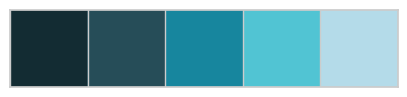

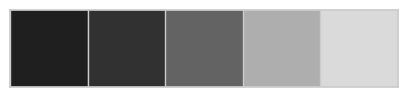

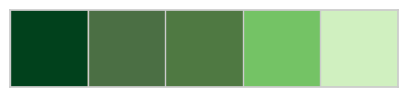

In [319]:
# set up the colors for visualization

# Define a palette of shades of blue
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']

# Define a palette of dark shades
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']

# Define a palette of shades of green
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

# Display a color palette as a horizontal array of swatches
sns.palplot(colors_blue)
sns.palplot(colors_dark)
sns.palplot(colors_green)

- We have 84% of Existing customer data and 16% of Attrited customer data. Based on the percentage of the distribution of target, we can say that this dataset is imbalanced. Therefore, when we choose evaluation metrics, we need to consider imbalanced distribution of the target, and we should avoid to use accuracy.

In [320]:
df.head()

,Churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Exist,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Exist,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Exist,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Exist,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Exist,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


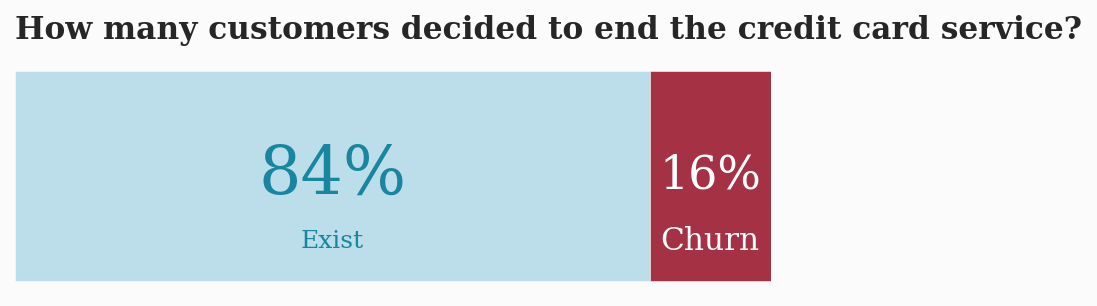

In [321]:
# Create data to present
x = df.groupby(['Churn'])['Churn'].count() # count the number of churn and non-churn customers
y = len(df) # get the total number of customers
r = ((x/y)).round(2) # calculate the ratio of churn to non-churn customers
ratio = pd.DataFrame(r).T # create a data frame from the ratio

# Set up plot
fig, ax = plt.subplots(1,1,figsize=(6.5, 2), dpi=150) # create figure and axis objects
background_color = '#fbfbfb'
fig.patch.set_facecolor(background_color) # set background color of figure
ax.set_facecolor(background_color) # set background color of axis

# Create horizontal bar chart
ax.barh(ratio.index, ratio['Exist'], color=colors_blue[4], alpha=0.9, 
       ec=background_color, label='Exist') # add bar for existing customers
ax.barh(ratio.index, ratio['Churn'], left=ratio['Exist'], color='#9b1b30',
       alpha=0.9, ec=background_color, label='Churn') # add bar for churned customers

ax.set_xlim(0,1) # set x-axis limits
ax.set_xticks([]) # remove x-axis ticks
ax.set_yticks([]) # remove y-axis ticks
ax.legend().set_visible(False) # remove legend
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False) # remove spines from axis

# Add annotations for data
for i in ratio.index:
    ax.annotate(f"{int(ratio['Exist'][i]*100)}%", xy=(ratio['Exist'][i]/2, i),
               va = 'center', ha= 'center', fontsize=32, fontweight='light',
               fontfamily='serif', color=colors_blue[2]) # add annotation for existing customers
    ax.annotate('Exist', xy=(ratio['Exist'][i]/2, -0.25), va='center', ha='center',
               fontsize=12, fontweight='light', fontfamily='serif', color=colors_blue[2]) # add label for existing customers
    
for i in ratio.index:
    ax.annotate(f"{int(ratio['Churn'][i]*100)}%", xy=(ratio['Exist'][i]+ratio['Churn'][i]/2, i),
               va='center', ha='center', fontsize=22, fontweight='light',
               fontfamily='serif', color='white') # add annotation for churned customers
    ax.annotate('Churn', xy=(ratio['Exist'][i]+ratio['Churn'][i]/2, -0.25),
               va='center', ha='center', fontsize=15, fontweight='light', fontfamily='serif', color='white') # add label for churned customers

# Add title to figure
fig.text(0.125, 0.95, 'How many customers decided to end the credit card service?', 
        fontfamily='serif', fontweight='bold', fontsize=15)

plt.show() # display plot

### Numerical variables

In [322]:
# create continous and discrete variable lists 
continous = []
discrete = []

# loop through each numerical variable
for num in num_vars:
     # if the number of unique values is less than 10, categorize as discrete
    if df[num].nunique() < 10:
        discrete.append(num)
    # otherwise, categorize as continuous
    else: 
        continous.append(num)
        
# print summary statistics        
print('There are {} continous variables'.format(len(continous)))
print('The continous variables are: {}'.format(continous))
print('')
print('There are {} discrete variables'.format(len(discrete)))
print('The discrete variable is: {}'.format(discrete))

There are 10 continous variables
The continous variables are: ['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

There are 4 discrete variables
The discrete variable is: ['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']


#### Continous Variables
- Let's create histograms of continuos variables and boxplots to see if they have outliers.

In [323]:
import plotly.graph_objs as go
import scipy.stats as stats
import numpy as np

In [324]:
def plot_nums(df, variable):
    """ Function to visualize histogram, q-q plot and box plot for continous variables"""
    
    # Create a figure with three subplots: histogram, q-q plot, and box plot
    plt.figure(figsize=(16, 4))
    plt.subplot(1,3,1)
    
    # Create a histogram of the variable using 30 bins
    df[variable].hist(bins=30)
    
    # Set the title and x-axis label for the histogram plot
    plt.title('Histogram')
    plt.xlabel(variable)
    
    # Add a q-q plot of the variable to the second subplot
    plt.subplot(1,3,2)
    stats.probplot(df[variable], plot=plt)
    
    # Add a box plot of the variable to the third subplot
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    # Display the plots
    plt.show()

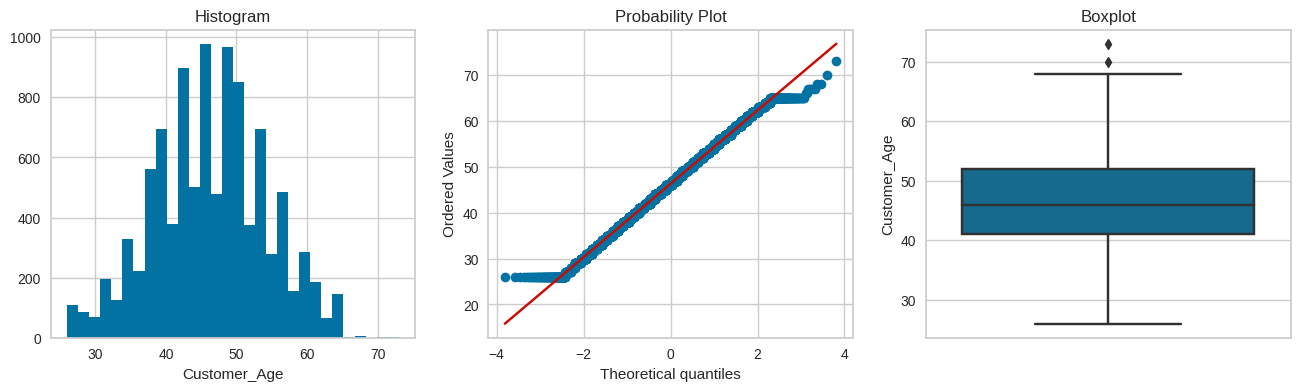

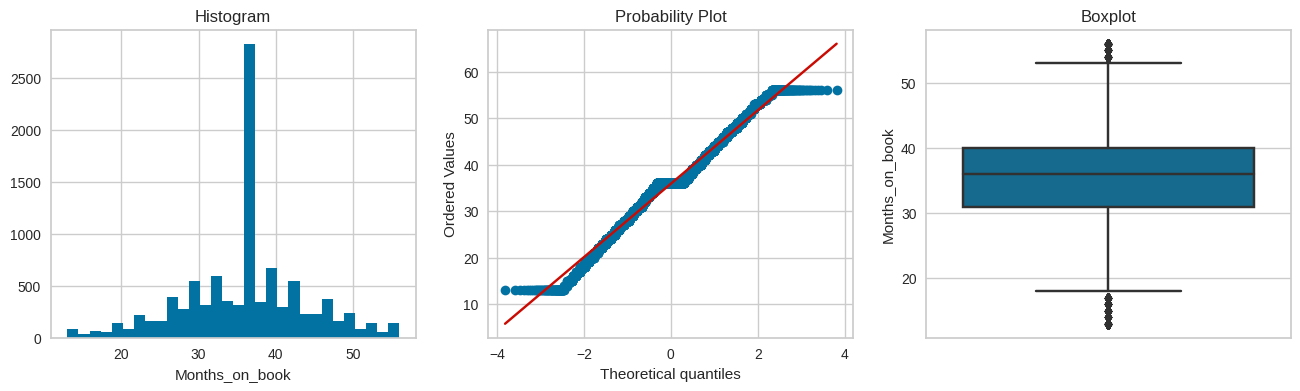

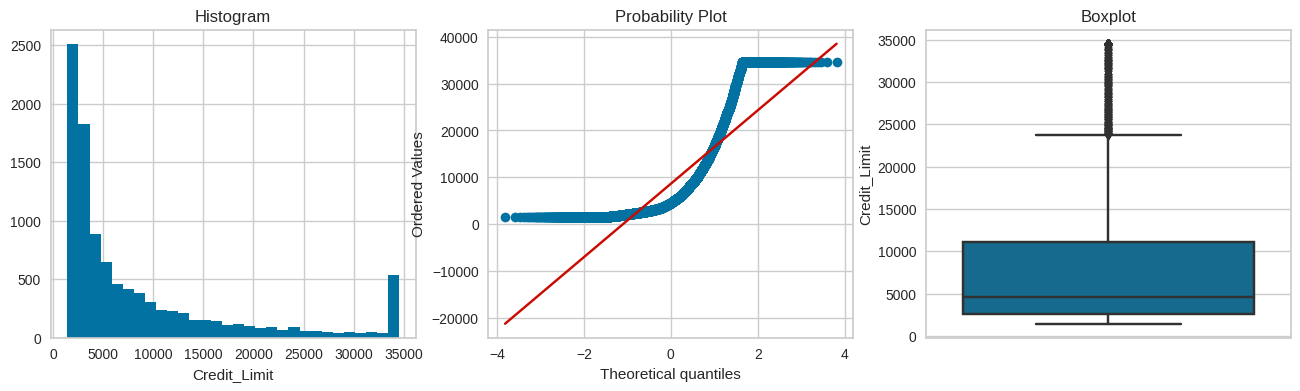

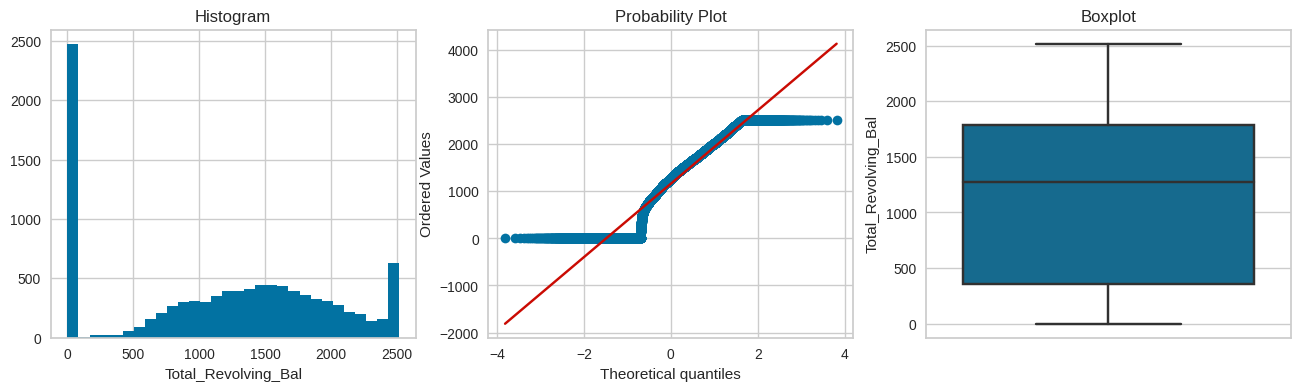

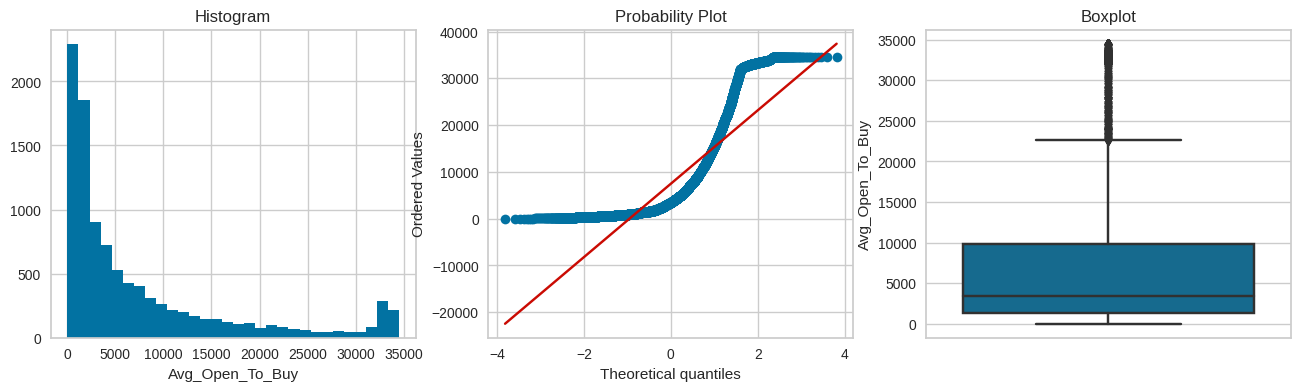

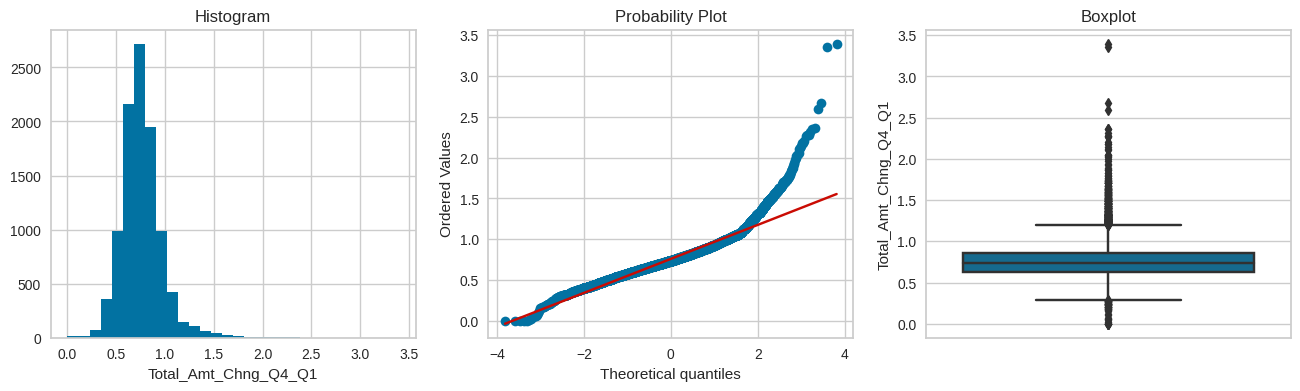

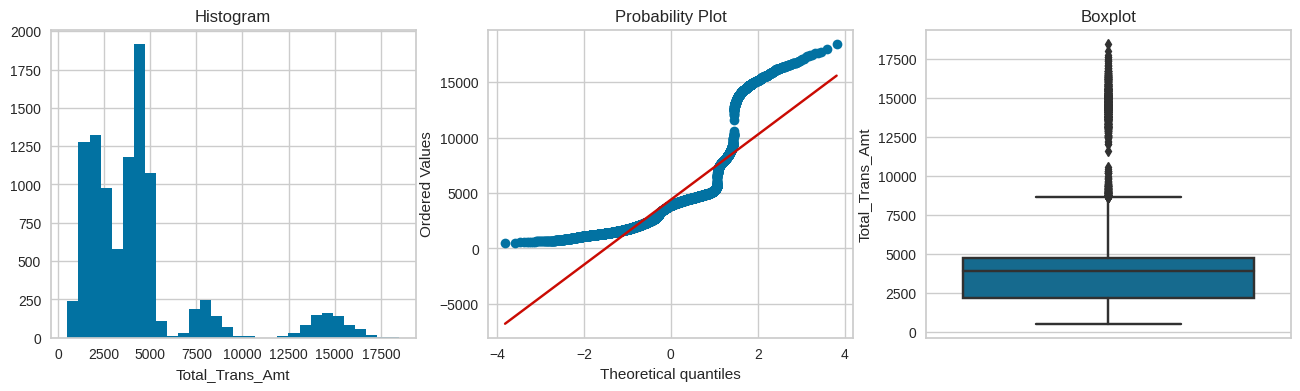

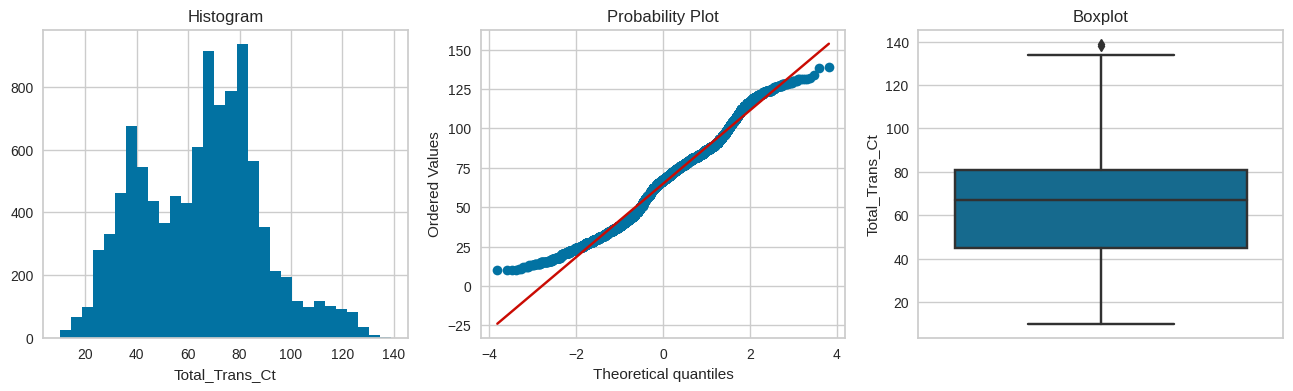

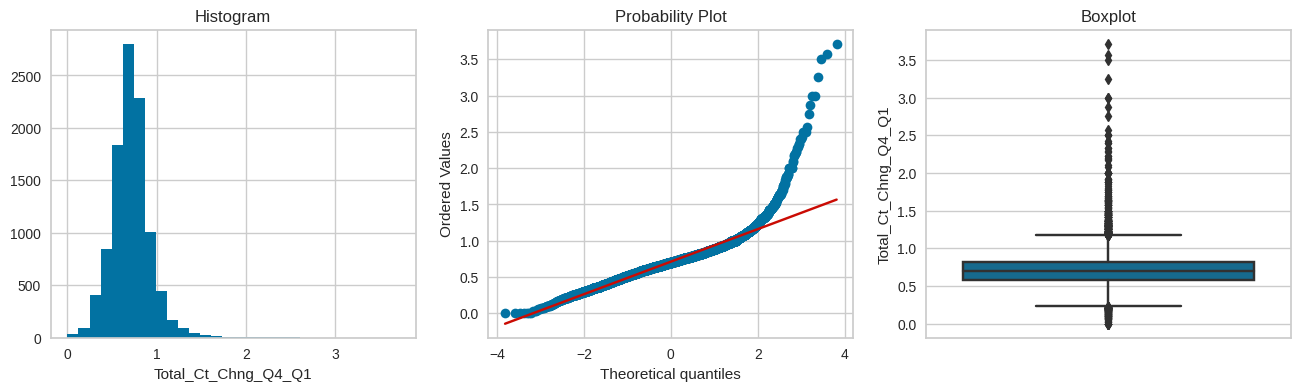

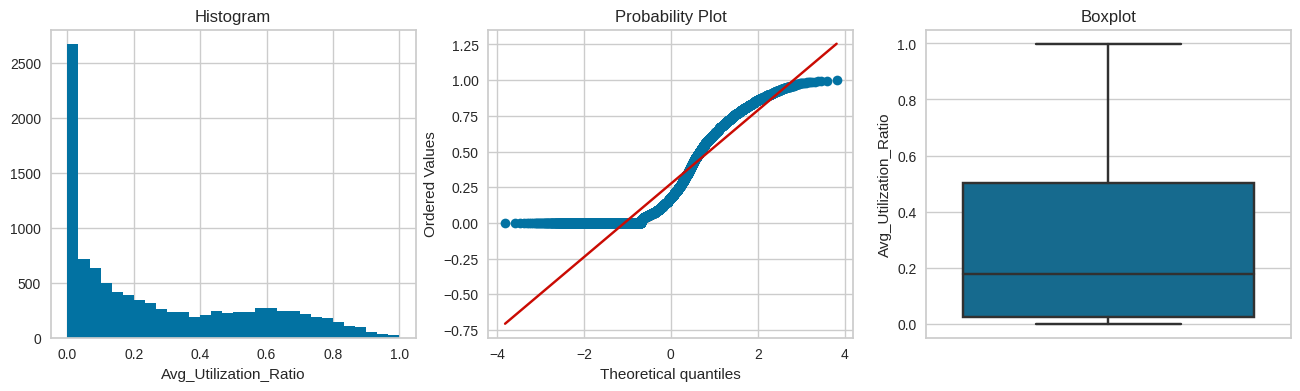

In [325]:
# Loop through each variable in the continuous list
for var in continous:
    # Call the plot_nums() function to create plots for the variable
    plot_nums(df, var)

###### Observations:

- Customer_Age: It has a normal distribution with outliers (>70).
- Months_on_book: It is a gaussian distribution but has the extreme peak of 36.
- Credit_Limit: It is skewed distribution towards right with a lot of outliers (>25000).
- Total_Revolving_Bal: It has a lot of 0 values and it doesn't show a gaussian distribution.
- Avg_Open_To_Buy: It is skewed distribution towards right with a lot of outliers.
- Total_Amt_Chng_Q4_Q1: It shows a gaussian distribution with outliers.
- Total_Trans_Amt: It doesn't have a normal distribution.
- Total_Trans_Ct: It looks like binomial distribution (with two peaks).
- Total_Ct_Chng_Q4_Q1: It has a gaussian distribution with outliers.
- Avg_Utilization_Ratio: It has skewed distribution towards right.
NOTE: We might need to use data transformation methods (e.g. log transformation, or yeo-johnson transformation), because we have skewed distributed variables.

We saw the distributions of continuous variables.

Now, let's see the differences between churn customers and existing customers depending on each feature.

In [326]:
# create two groups for Exist and Churn
Exist = df[df['Churn']!='Churn']
Churn = df[df['Churn']=='Churn']

In [327]:
Exist.shape, Churn.shape

((8500, 20), (1627, 20))

Text(19, 0.065, '- Exist group has binomial distribution, but Churn group shows right-skewed distribution.')

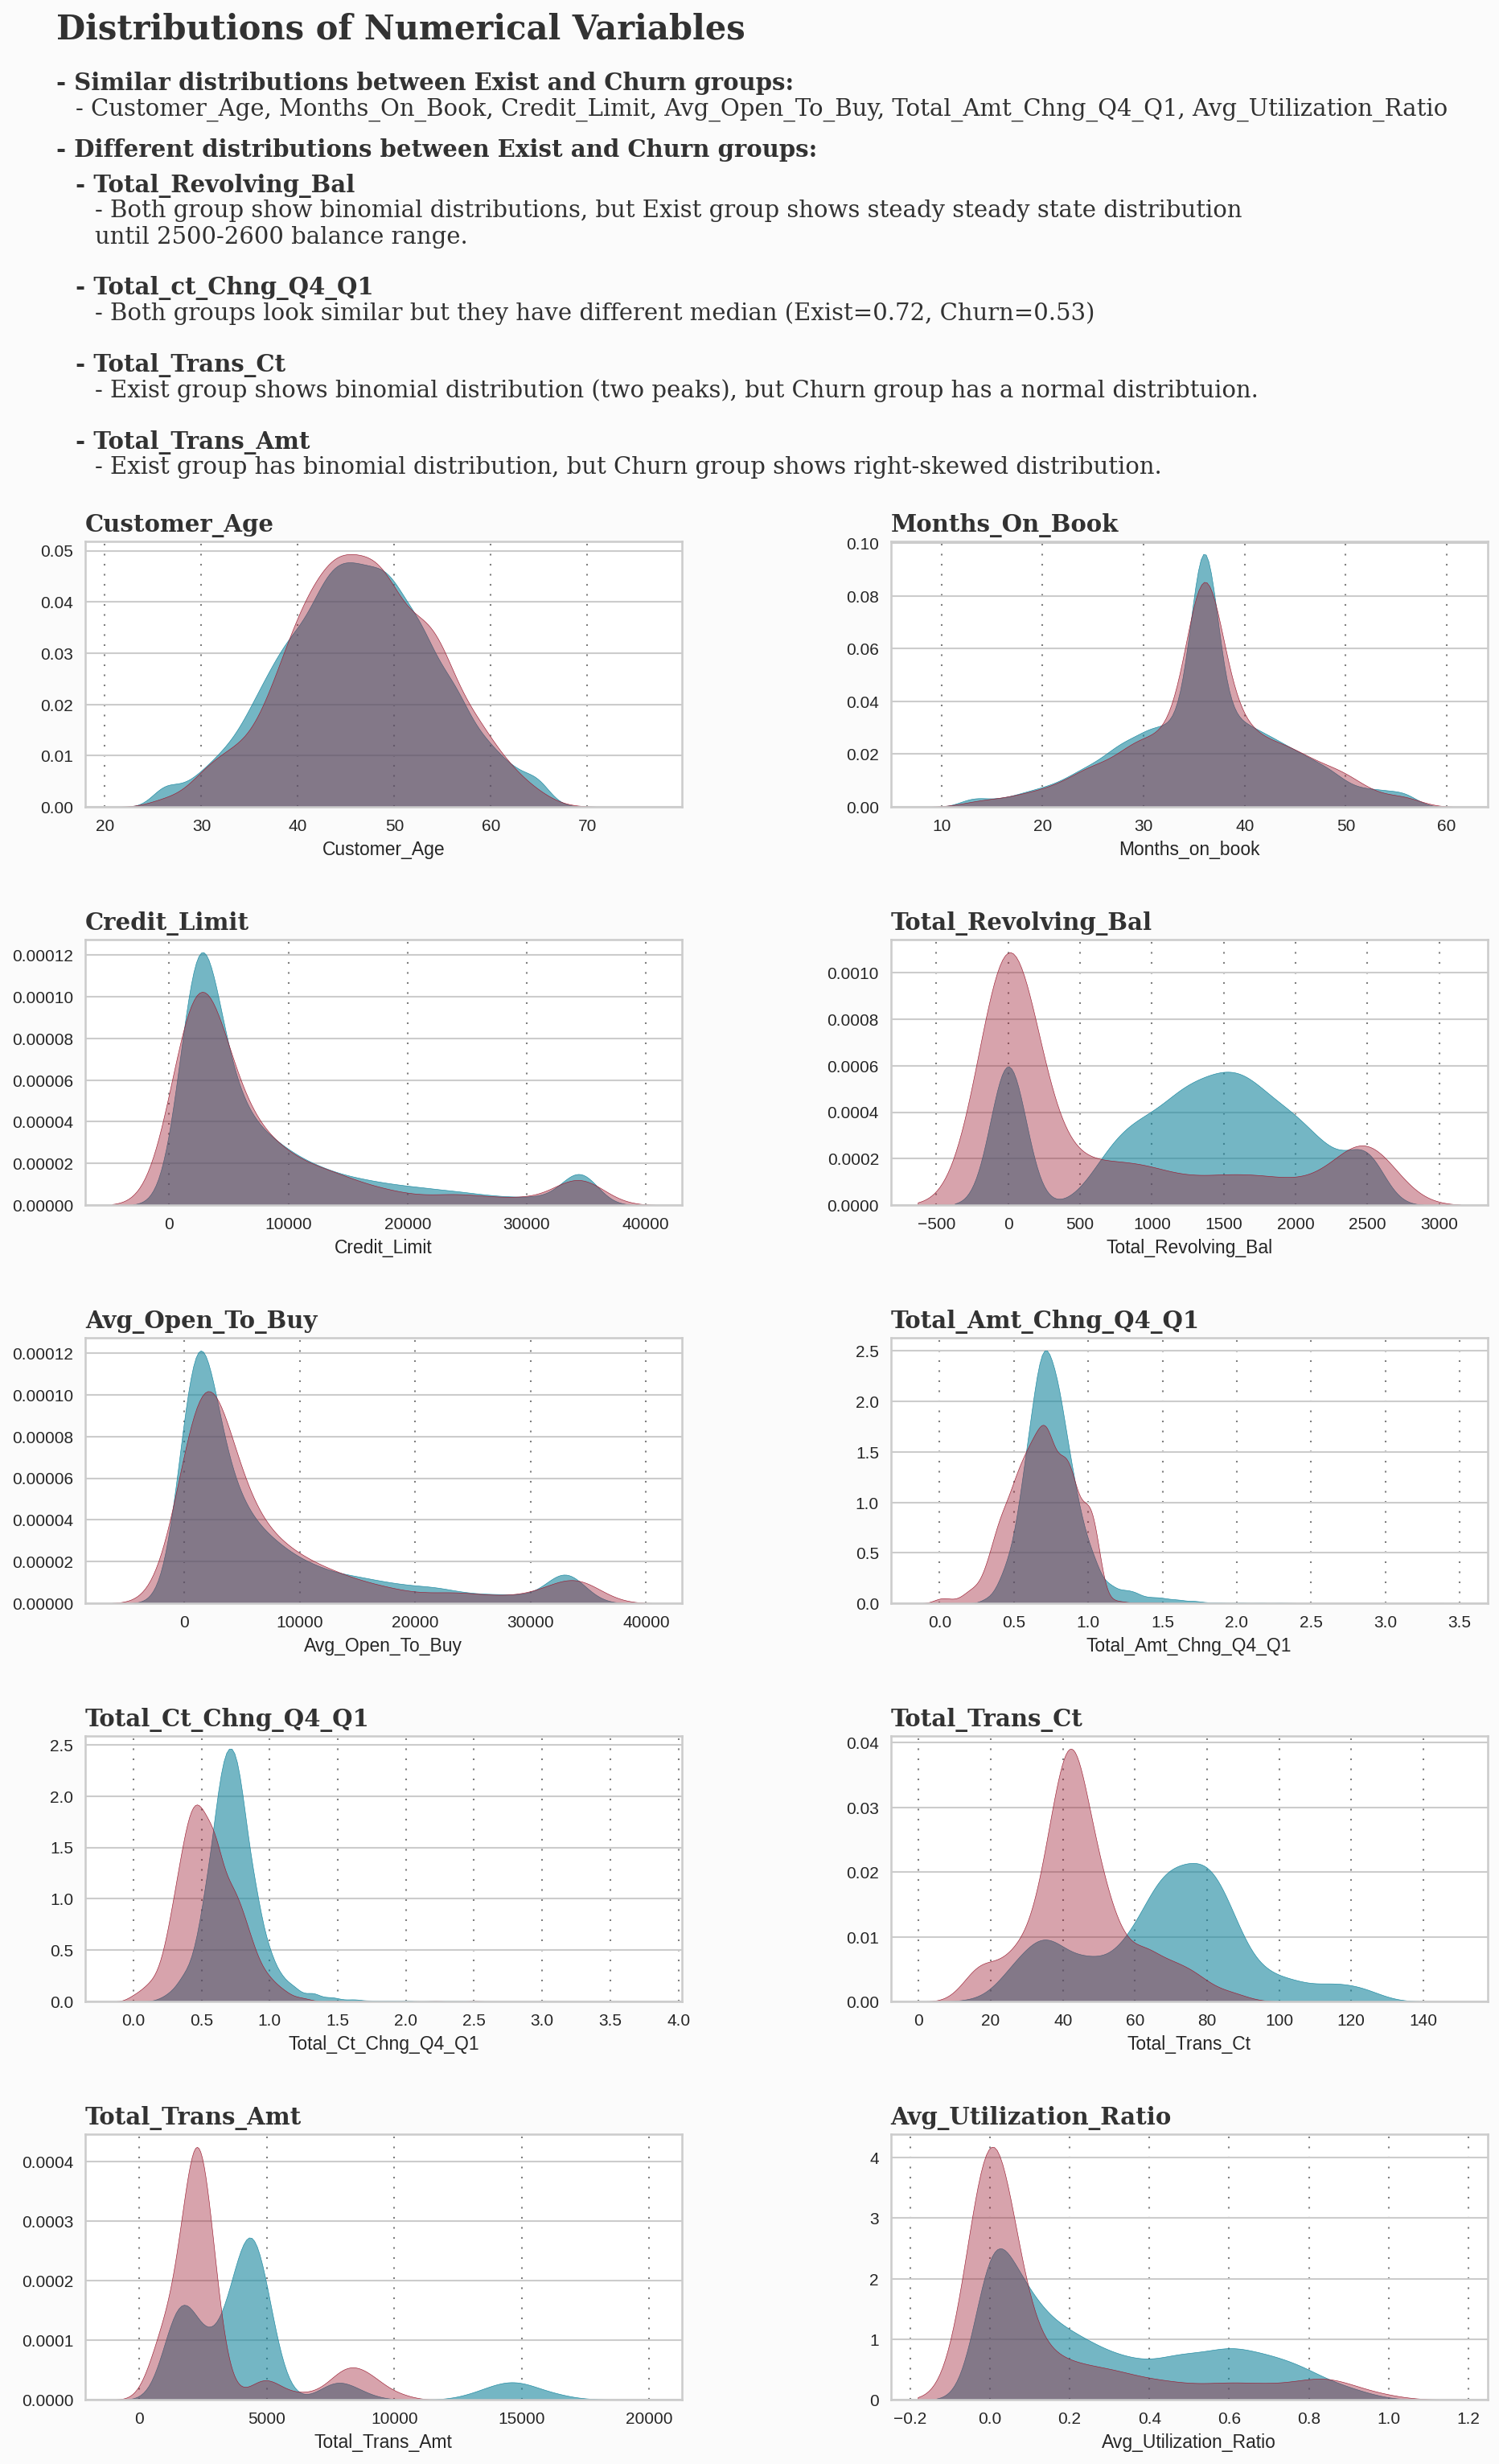

In [328]:
# sets a variable background_color to a light gray
background_color = '#fbfbfb'

#create a new figure 
fig = plt.figure(figsize=(15,20), dpi=150)
fig.patch.set_facecolor(background_color) # set up background color

#create a grid of 5 rows and 2 columns
gs = fig.add_gridspec(5, 2)
gs.update(wspace=0.35, hspace=0.5)

# axes as a list
axes = [fig.add_subplot(gs[0,0]),
        fig.add_subplot(gs[0,1]),
        fig.add_subplot(gs[1,0]),
        fig.add_subplot(gs[1,1]),
        fig.add_subplot(gs[2,0]),
        fig.add_subplot(gs[2,1]),
        fig.add_subplot(gs[3,0]),
        fig.add_subplot(gs[3,1]),
        fig.add_subplot(gs[4,0]),
        fig.add_subplot(gs[4,1])]

# numeric columns as a list
num_feats = ['Customer_Age', 'Months_on_book','Credit_Limit','Total_Revolving_Bal',
             'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1', 
             'Total_Trans_Ct','Total_Trans_Amt', 'Avg_Utilization_Ratio']



def HistPlots(df, xVar, ax):
    """ Function to create histograms for numerical variables
    Args:
        df: dataframe
        xVar: a list for numerical variables
        ax: ax for each graph
    """
    # create kernel density estimate plots
    sns.kdeplot(Exist[xVar], ax=ax, color=colors_blue[2], alpha=0.6, shade=True, label='Exist')
    sns.kdeplot(Churn[xVar], ax=ax, color='#9b1b30', alpha=0.4, shade=True, label='Churn')
    
    #sets the grid lines for the x-axis
    ax.grid(which='major', color='gray', linestyle=':', axis='x', zorder=0, dashes=(1,5))
    #ax.set(yticks=[])
    ax.set_title(f'{xVar}'.title(), fontsize=14, fontweight='bold', fontfamily='serif',
                color='#323232', loc='left')

    ax.set_ylabel('')

    
    # create histograms by using zip
for ax, xVar in zip(axes, num_feats):
    HistPlots(df, xVar, ax)
    
    

# Add observations
axes[0].text(15, 0.15, 'Distributions of Numerical Variables',
            fontsize=20, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(15, 0.14, '- Similar distributions between Exist and Churn groups:',
            fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(17, 0.135, '- Customer_Age, Months_On_Book, Credit_Limit, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Avg_Utilization_Ratio',
            fontsize=14, fontweight='light', fontfamily='serif', color='#323232')

axes[0].text(15, 0.127, '- Different distributions between Exist and Churn groups:',
            fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(17, 0.120, '- Total_Revolving_Bal',
            fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(19, 0.110, '- Both group show binomial distributions, but Exist group shows steady steady state distribution \nuntil 2500-2600 balance range. ',
            fontsize=14, fontweight='light', fontfamily='serif', color='#323232')

axes[0].text(17, 0.100, '- Total_ct_Chng_Q4_Q1',
            fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(19, 0.095, '- Both groups look similar but they have different median (Exist=0.72, Churn=0.53)',
            fontsize=14, fontweight='light', fontfamily='serif', color='#323232')

axes[0].text(17, 0.085, '- Total_Trans_Ct',
            fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(19, 0.080, '- Exist group shows binomial distribution (two peaks), but Churn group has a normal distribtuion.',
            fontsize=14, fontweight='light', fontfamily='serif', color='#323232')

axes[0].text(17, 0.070, '- Total_Trans_Amt',
            fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(19, 0.065, '- Exist group has binomial distribution, but Churn group shows right-skewed distribution.',
            fontsize=14, fontweight='light', fontfamily='serif', color='#323232')



##### Observations for comparison histgrams:

- Age: Customer age. Both groups show normal distributions.
- Months_on_book: Months on book (Time of Relationship). As we can see in the graph below, both existing and churn groups have similar distribution patterns, and the medians are 36 months.
- Credit_Limit: Credit limit shows the credit limit on the credit cards. Both existing and churn groups are right-skewed distributions, and there are a lot of people who have 2k-4k credit limits.
- Total_Revolving_Bal: It shows the total revloving balance on the credit card. We can see the differences between exist and churn groups. 1) Churn group distribution is more likely to be a normal distribution except for 0-99 total revolving balance range. However, existing group shows steady state distribution until 2500-2600 balance range. There are some similarities between existing and churn groups: 1) The highest values of both groups are 0-99 total revolving balance. 2) They show high frequencies in 2500-2600 total revolving balances.
- Avg_Open_To_Buy: It shows open to buy credit line (average of last 12 months). Both exist and churn groups show right-skewed distribtuions.
- Total_Amt_Chng_Q4_Q1: It shows total change in transaction amount (Q4 over Q1). Both groups are normal distributions with outliers. Existing group has more outliers.
- Total_Ct_Chng_Q4_Q1: Both distributions show normal distributions, but there are a lot of outliers.
- Total_Trans_Ct: For exist group, it shows binomial distribution. We can see that there are two peaks between 35 and 39, and between 75 and 79. For churn group, it shows a normal distribtuion, and the median is 43.
- Total_Trans_Amt: Total Transaction Amount (Last 12 months). Both are right skewed distributions but there are some differences between existing and churn groups. 1) for existing group, there are a lot of customers in 4000-4999 range, while there are large number of customers in 2000-2999 range for churn group. 2) the second most highest value is 1000-1999 range for both groups, but there are few customers who are in the range more than 3000 for churn group.
- Avg_Utilization_Ratio: Average card utilization ratio. Both groups show right skewed distributions.
*NOTE: The variables which showed differences between churn and exist customers might be good predictors when building machine learning models.


### Discrete variables
- We have 4 discrete variables. Here, we will create bar charts for those variables, and see each data shape. Also, we will explore if there are some differences between churn and exist customers on those discrete variables.

In [329]:
def barPerc(df, xVar, ax):
    """
    source: https://stackoverflow.com/a/67076347/4852724
    
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable
        ax: Axes object (for Seaborn Countplot/Bar plot or
                             pandas bar plot)
    """
    # 1. How many X categories
    ## check for NaN and remove
    numX = len([x for x in df[xVar].unique() if x==x])
    
    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##     [0, 8, 16, 24] are hue bars for 1st X category
        hueBars = bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])
        
        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                   bar.get_height() - 0.1 * bar.get_height(),
                   f"{bar.get_height()/total:.2%}",
                   ha='center', va='top', color='black')
            
def GrpSubplots(df, xVar, ax, axis=None, ticklabels=None):
    """
    Create subplots based on X variables
    """
    df.groupby([xVar, 'Churn']).size().unstack('Churn').apply(lambda x: x*100/x.sum(), axis=axis).plot.bar(rot=0,
                                                                                                           width=0.9,
                                                                                                           color=[colors_green[4], colors_blue[4]],
                                                                                                           ax=ax);
    ax.set_title(f'{xVar}'.title(), fontsize=14, fontweight='bold', fontfamily='serif', color='#323232', loc='left')
    ax.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    ax.set_xticklabels(ticklabels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.yaxis.set_major_locator(mtick.MultipleLocator(10))
    ax.get_legend().remove()
    
    barPerc(df, xVar, ax)
    

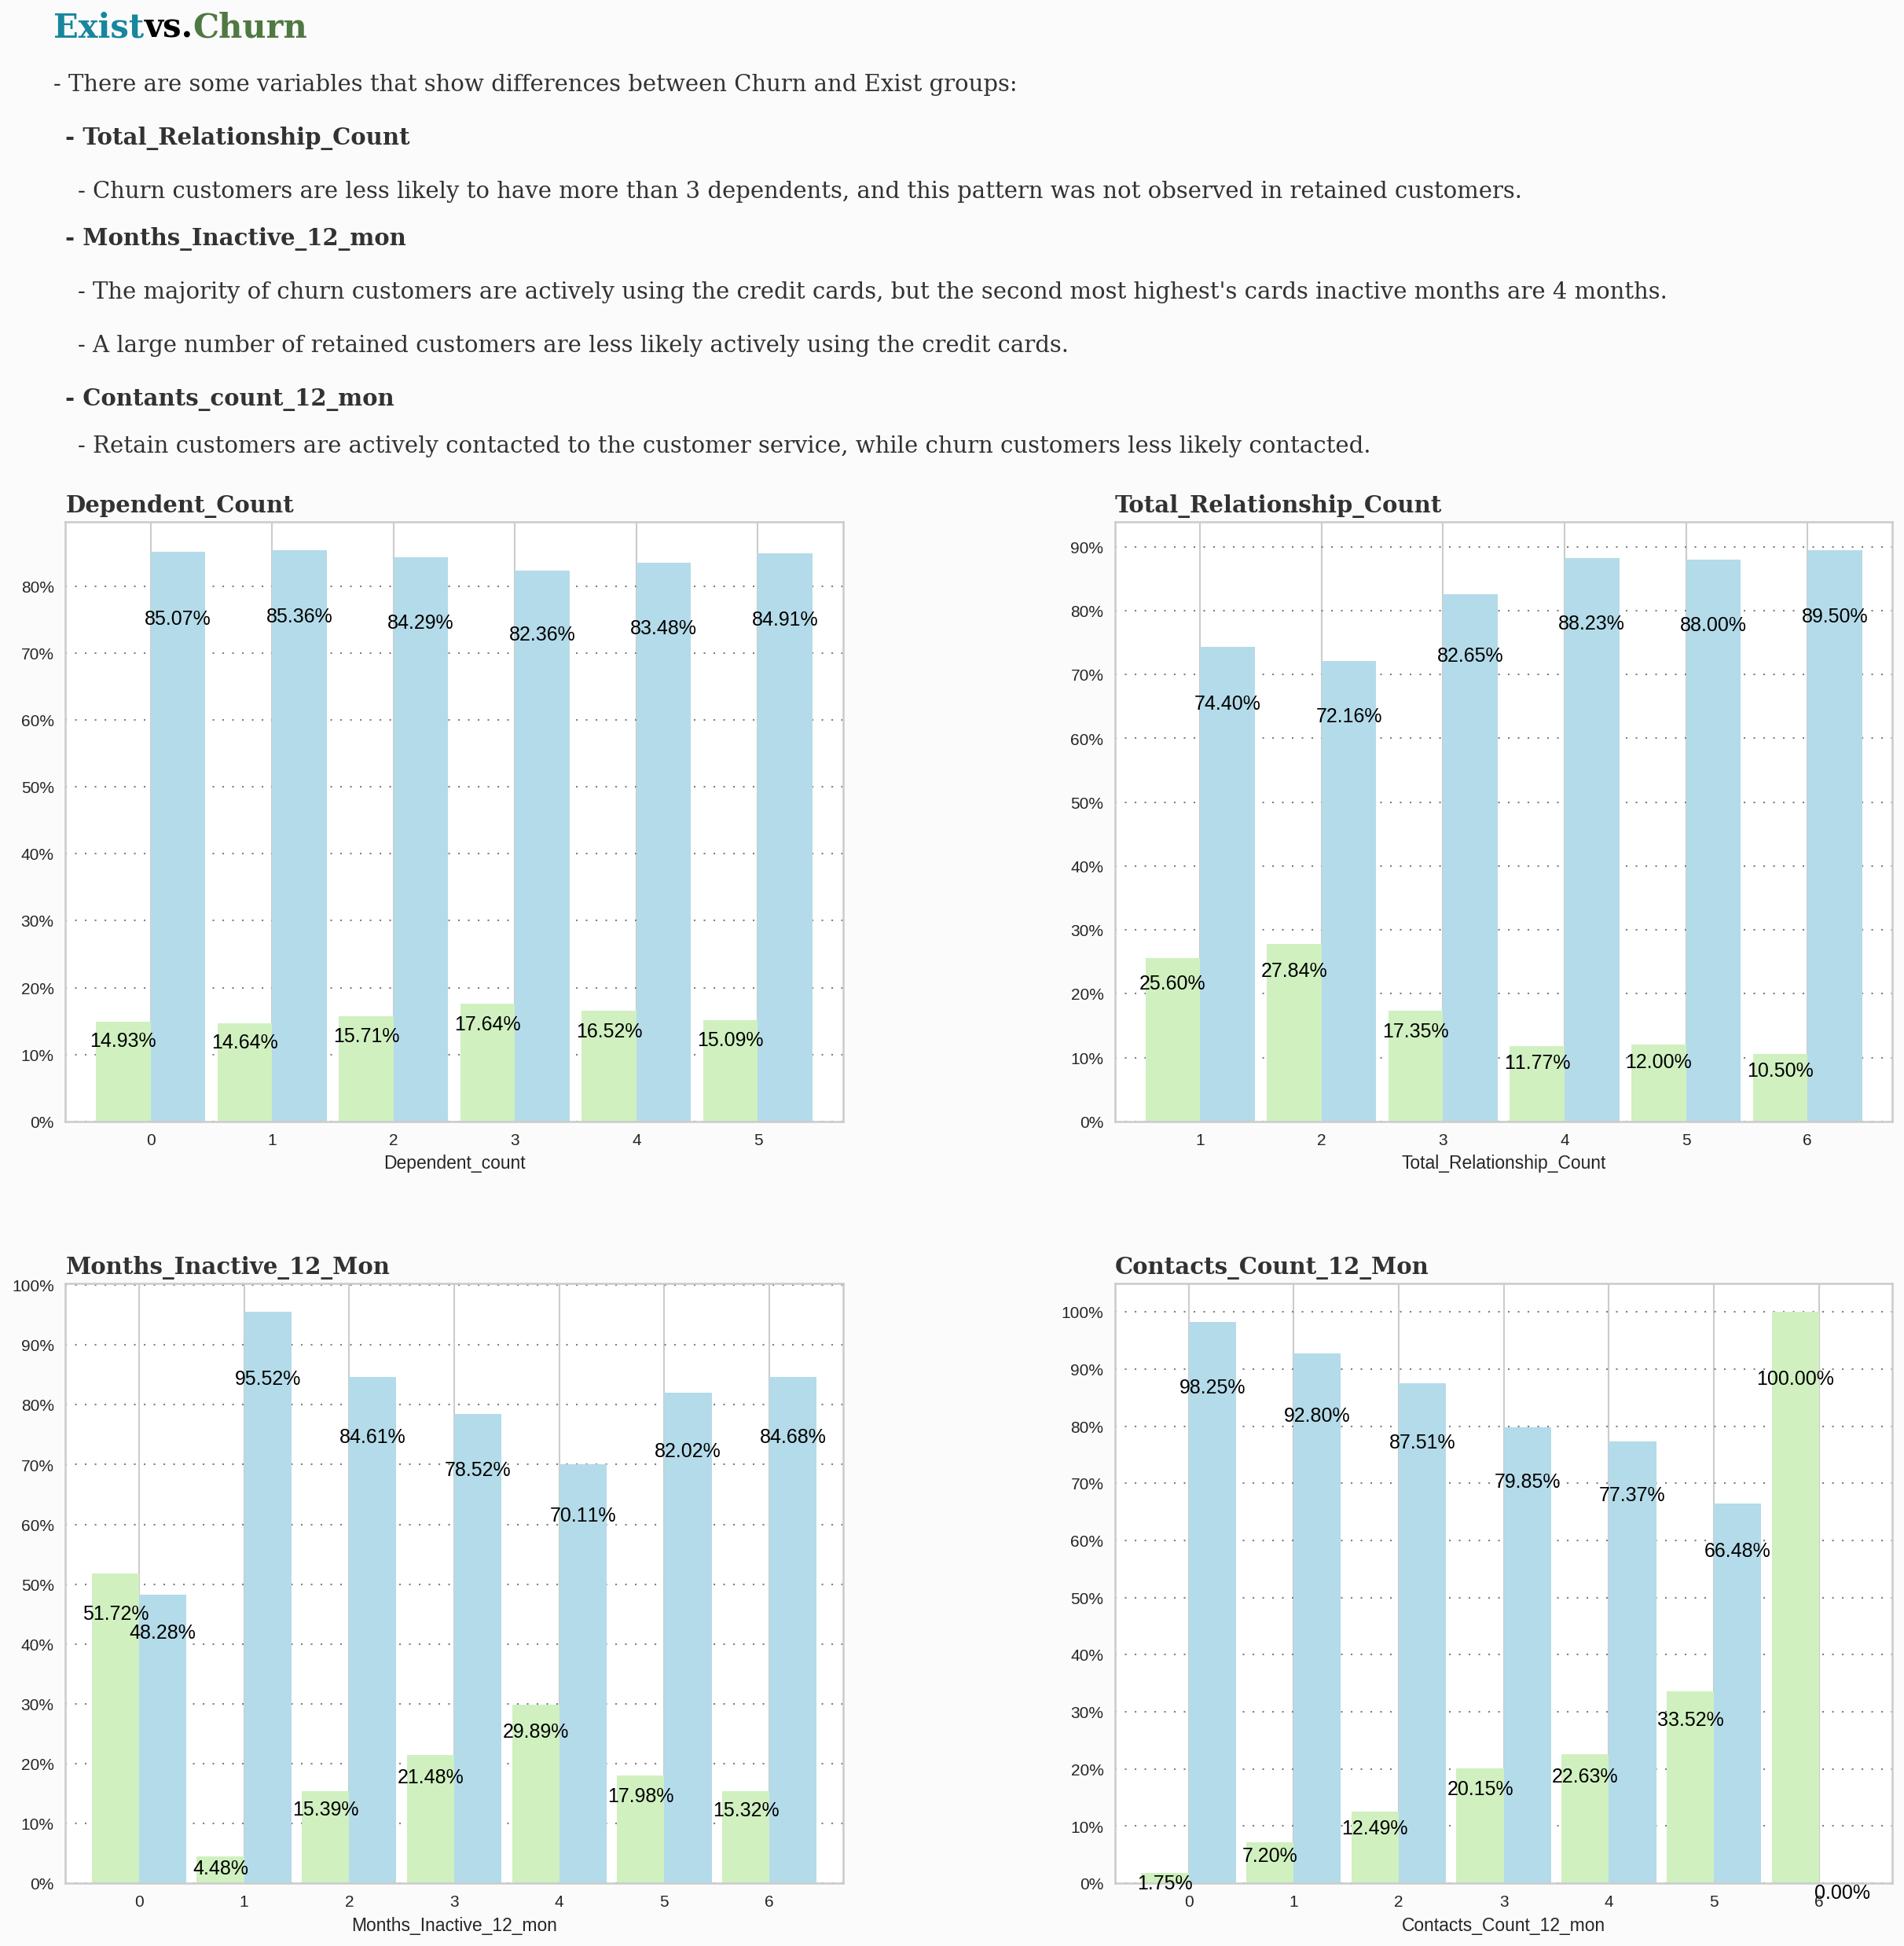

In [330]:
background_color='#fbfbfb'

fig = plt.figure(figsize=(20,15), dpi=150)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.35, hspace=0.27)

# axes as a list
axes = [fig.add_subplot(gs[0,0]),
       fig.add_subplot(gs[0,1]),
       fig.add_subplot(gs[1,0]),
       fig.add_subplot(gs[1,1])]

# categories as a list
cats = ['Dependent_count', 'Total_Relationship_Count', 
        'Months_Inactive_12_mon', 'Contacts_Count_12_mon']

# ticklabels as list
tlabs = [[0, 1, 2, 3, 4, 5]] + [[1,2,3,4,5,6]] + [[0, 1, 2, 3, 4, 5, 6]]*2 

for ax, xVar, ticklabels in zip(axes, cats, tlabs):
    GrpSubplots(df, xVar, ax, axis=1, ticklabels=ticklabels)

# green - churn
# blue - exist

axes[0].text(-0.80, 162, 'Exist', fontsize=20, 
        fontweight='bold', fontfamily='serif', color=colors_blue[2])
axes[0].text(-0.05, 162, 'vs.', fontsize=20,
        fontweight='bold', fontfamily='serif', color='black')
axes[0].text(0.35, 162, 'Churn', fontsize=20,
        fontweight='bold', fontfamily='serif', color=colors_green[2])
axes[0].text(-0.80, 154, '- There are some variables that show differences between Churn and Exist groups:',
        fontsize=14, fontfamily='serif', color='#323232')
axes[0].text(-0.70, 146, '- Total_Relationship_Count',
        fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(-0.60, 138, "- Churn customers are less likely to have more than 3 dependents, and this pattern was not observed in retained customers.",
        fontsize=14, fontfamily='serif', color='#323232')
axes[0].text(-0.70, 131, "- Months_Inactive_12_mon",
        fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(-0.60, 123, "- The majority of churn customers are actively using the credit cards, but the second most highest's cards inactive months are 4 months.",
        fontsize=14, fontfamily='serif', color='#323232')
axes[0].text(-0.60, 115, "- A large number of retained customers are less likely actively using the credit cards.",
        fontsize=14, fontfamily='serif', color='#323232')

axes[0].text(-0.70, 107, "- Contants_count_12_mon",
        fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(-0.60, 100, "- Retain customers are actively contacted to the customer service, while churn customers less likely contacted.",
        fontsize=14, fontfamily='serif', color='#323232');

##### Categorical variables
- We have 5 categorical variables. Let's look at the number of cardinality in each categorical variable.

In [331]:
df[cat_vars].head(2)

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue


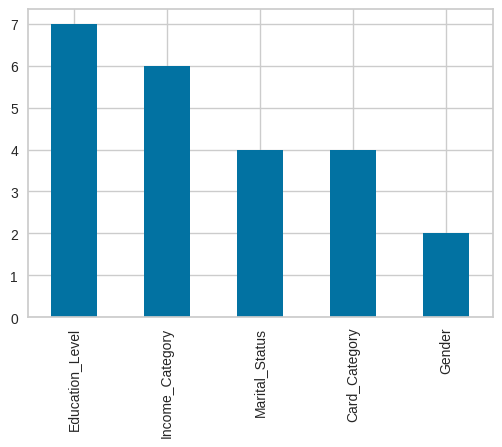

In [332]:
df[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(6,4));

All categorical variables show low cardinality, this means that they have only few different labels. This is good as we don't need to tackle cardinality.

Next, let's explore whether each categorical variable has rare label.

In [333]:
for var in cat_vars:
    print(var)
    print(df[var].value_counts()/len(df))
    print()

Gender
F    0.529081
M    0.470919
Name: Gender, dtype: float64

Education_Level
Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: Education_Level, dtype: float64

Marital_Status
Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: Marital_Status, dtype: float64

Income_Category
Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
Unknown           0.109805
$120K +           0.071788
Name: Income_Category, dtype: float64

Card_Category
Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: Card_Category, dtype: float64



Even though some labels (e.g. Platinum in Card_Category) are rare labels (<5%), we don't need to treat with those labels because there is only one rare label in categories.

Lastly, we would like to see the differences between Churn and Exist groups on categorical variables.

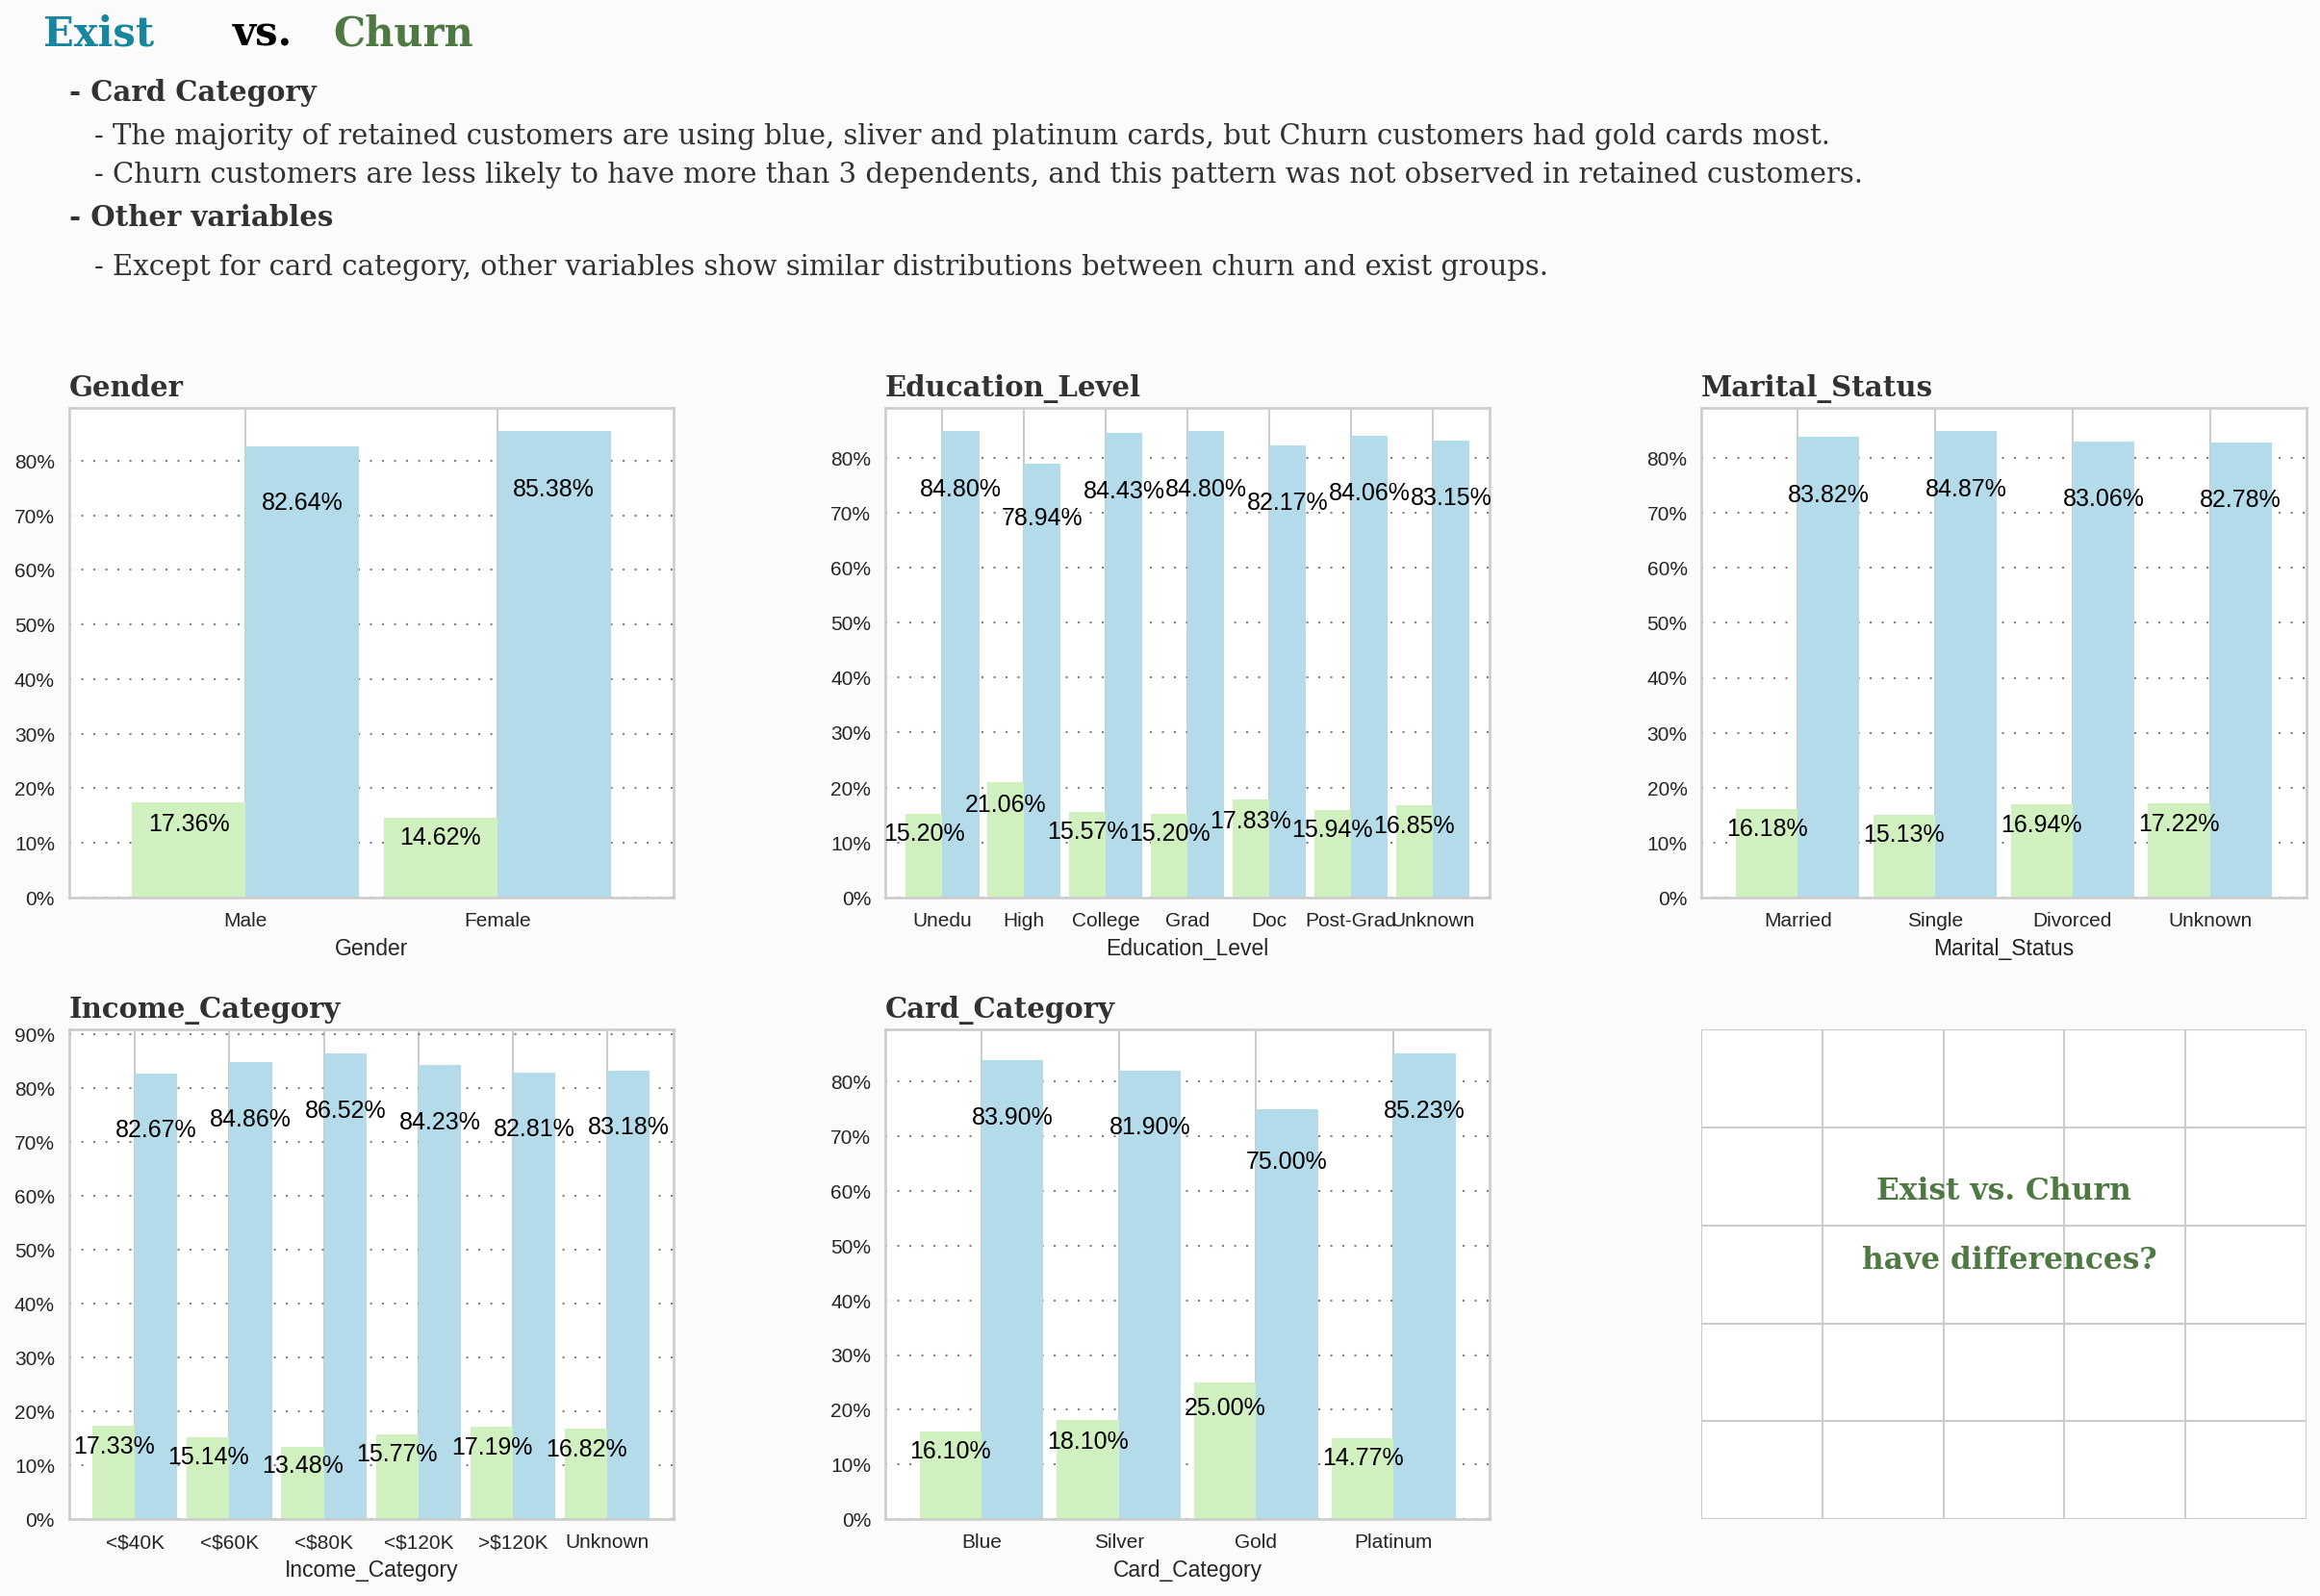

In [334]:
background_color='#fbfbfb'

fig = plt.figure(figsize=(20,10), dpi=150)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.35, hspace=0.27)

# axes as a list
axes = [fig.add_subplot(gs[0,0]),
       fig.add_subplot(gs[0,1]),
       fig.add_subplot(gs[0,2]),
       fig.add_subplot(gs[1,0]),
       fig.add_subplot(gs[1,1]),
       fig.add_subplot(gs[1,2])]

# categories as a list
cats = ['Gender','Education_Level','Marital_Status',
        'Income_Category', 'Card_Category']

# ticklabels as list
tlabs = [['Male', 'Female']] + [['Unedu','High', 
                         'College','Grad','Doc',
                         'Post-Grad', 'Unknown']] + [['Married', 'Single',
                                                          'Divorced','Unknown']] + [['<$40K','<$60K',
                                                                                     '<$80K', '<$120K', '>$120K','Unknown']] + [['Blue','Silver',
                                                                                                                                              'Gold','Platinum']]

for ax, xVar, ticklabels in zip(axes, cats, tlabs):
    GrpSubplots(df, xVar, ax, axis=1, ticklabels=ticklabels)

# green - churn
# blue - exist

axes[5].spines["bottom"].set_visible(False)
axes[5].spines["top"].set_visible(False)
axes[5].spines["left"].set_visible(False)
axes[5].spines["right"].set_visible(False)
axes[5].tick_params(left=False, bottom=False)
axes[5].set_xticklabels([])
axes[5].set_yticklabels([])
axes[5].text(0.5, 0.6, 'Exist vs. Churn\n\n have differences?', 
             horizontalalignment='center', verticalalignment='center',
             fontsize=15, fontweight='bold', fontfamily='serif', color=colors_green[2])


axes[0].text(-0.80, 156, 'Exist', fontsize=20, 
        fontweight='bold', fontfamily='serif', color=colors_blue[2])
axes[0].text(-0.05, 156, 'vs.', fontsize=20,
        fontweight='bold', fontfamily='serif', color='black')
axes[0].text(0.35, 156, 'Churn', fontsize=20,
        fontweight='bold', fontfamily='serif', color=colors_green[2])

axes[0].text(-0.70, 146, '- Card Category',
        fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(-0.60, 138, '- The majority of retained customers are using blue, sliver and platinum cards, but Churn customers had gold cards most.',
        fontsize=14, fontfamily='serif', color='#323232')

axes[0].text(-0.60, 131, "- Churn customers are less likely to have more than 3 dependents, and this pattern was not observed in retained customers.",
        fontsize=14, fontfamily='serif', color='#323232')
axes[0].text(-0.70, 123, "- Other variables",
        fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(-0.60, 114, "- Except for card category, other variables show similar distributions between churn and exist groups.",
        fontsize=14, fontfamily='serif', color='#323232');


##### Correlation between numerical variables

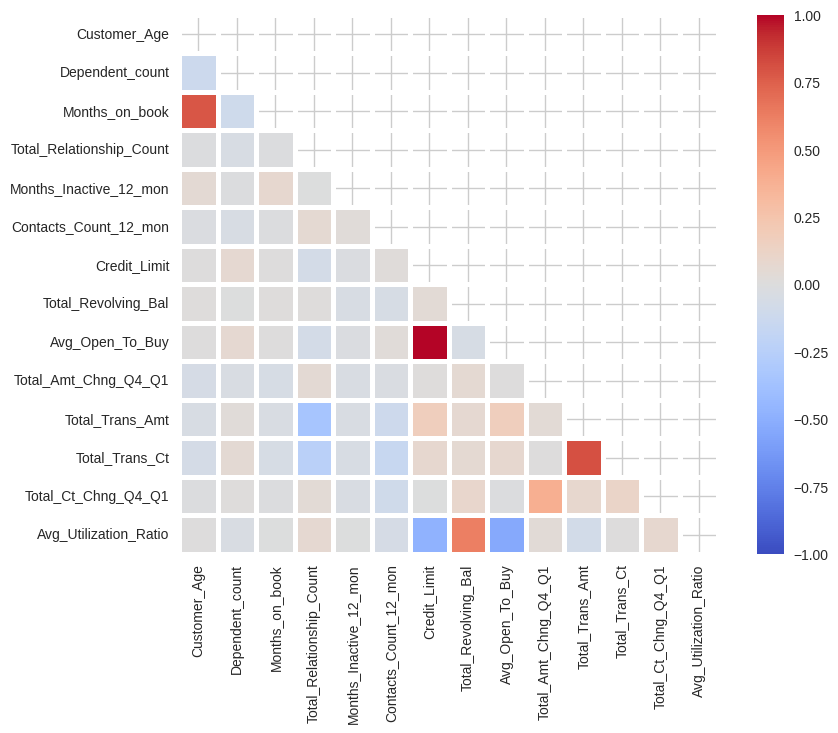

In [335]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,7))

pl = sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1.0, vmin=-1.0, 
                center=0, square=True, linewidths=2.5)
plt.show()

- Customer_Age and Months_on_book are highly positively correlated.
- Credit_Limit and Avg_Open_To_Buy are highly positively correlated.
- ToalTrans_Ct and Total_Trans_Amt are positively correlated.
- Credit_Limit and Avg_Utilization_Ratio are negatively correlated.
- Avg_Open_To_Buy and Avg_Utilization_Ratio are negatively correlated.
NOTE: When performing feature selection, we need to consider these correlations between variables.

#### Conclusion   on Data Cleaning ,  EDA and Visualization
I have a classification problem with binary target variable.I have explored target and features, and their relationships. Also, I investigated whether Churn group is different from Exist group depending on features.

This dataset does not contain any missing observation so that we don't need to deal with missing values. However, target distribution shows imbalanced distribution, and therefore when building models, we might need to use sample balancing methods to improve model performances.

#### Feature Engineering and Scaling

In [336]:
# Data pre-processing

from sklearn.preprocessing import (
    StandardScaler, 
    RobustScaler,
    MinMaxScaler,
    MaxAbsScaler,
    RobustScaler,
)
from sklearn.model_selection import train_test_split


# Modelling 
from sklearn.metrics import (
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    auc,
    precision_score, 
    accuracy_score, 
    recall_score,
    classification_report, 
    confusion_matrix
)




from yellowbrick.classifier import ROCAUC,PrecisionRecallCurve

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, 
    AdaBoostClassifier, 
    GradientBoostingClassifier)

import xgboost as xgb

# for feature engineering
from feature_engine import encoding as ce

# Evaluation & CV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score
# pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [337]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [338]:
!pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Feature Engineering

### Separate Train and Test set

Before we perform feature engineering techniques, we need to separate train and test set, because some methods should learn parameters from ONLY train to avoid over-fitting.

In [339]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Churn'], axis=1), #predictors
    df['Churn'], # target
    test_size=0.2, # the percentage of test size
    random_state=0, # for reproducibility
)

X_train.shape, X_test.shape  

((8101, 19), (2026, 19))

### Create function for evaluating model performances
- We would like to create function to evaluate model performances and this would help compare perfomances.

- I will use Random Forests for comparison and ROC-AUC score.

In [340]:
def run_RFs(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=40, random_state=42, max_depth=3)
    rf.fit(X_train, y_train)
    
    print("Train set")
    train_pred = rf.predict_proba(X_train)
    print("Random Forests roc-auc: {}".format(roc_auc_score(y_train, train_pred[:,1])))
    
    print("Test set")
    test_pred = rf.predict_proba(X_test)
    print("Random Forests roc-auc: {}".format(roc_auc_score(y_test, test_pred[:, 1])))
    
    return roc_auc_score(y_train, train_pred[:,1]), roc_auc_score(y_test, test_pred[:, 1])

In [341]:
# How many labels are in each category?
for cat in cat_vars:
    print(cat, "has {} labels".format(X_train[cat].nunique()))
    print(X_train[cat].unique())
    print()

Gender has 2 labels
['M' 'F']

Education_Level has 7 labels
['Graduate' 'Uneducated' 'Unknown' 'High School' 'College' 'Post-Graduate'
 'Doctorate']

Marital_Status has 4 labels
['Married' 'Single' 'Divorced' 'Unknown']

Income_Category has 6 labels
['$120K +' 'Unknown' 'Less than $40K' '$40K - $60K' '$80K - $120K'
 '$60K - $80K']

Card_Category has 4 labels
['Blue' 'Gold' 'Silver' 'Platinum']



### One Hoe Encoding (OHE)
One hot encoding, consists in encoding each categorical variable with different boolean variables (dummy variables) which take values 0 or 1, indicating if a category is present in an observation.

In [342]:
X_train_ohe = X_train.copy()
X_test_ohe = X_test.copy()

In [343]:
ohe_enc = ce.OneHotEncoder(
    top_categories=None,
    variables=cat_vars,
    drop_last=True
)

ohe_enc.fit(X_train_ohe)

OneHotEncoder(drop_last=True,
              variables=['Gender', 'Education_Level', 'Marital_Status',
                         'Income_Category', 'Card_Category'])

In [344]:
X_train_ohe = ohe_enc.transform(X_train_ohe)
X_test_ohe = ohe_enc.transform(X_test_ohe)

In [345]:
X_train_ohe.head(2)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Graduate,Education_Level_Uneducated,Education_Level_Unknown,Education_Level_High School,Education_Level_College,Education_Level_Post-Graduate,Marital_Status_Married,Marital_Status_Single,Marital_Status_Divorced,Income_Category_$120K +,Income_Category_Unknown,Income_Category_Less than $40K,Income_Category_$40K - $60K,Income_Category_$80K - $120K,Card_Category_Blue,Card_Category_Gold,Card_Category_Silver
147,55,2,50,3,2,0,10916.0,1536,9380.0,1.317,1592,34,1.000,0.141,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
1985,32,0,27,6,3,3,9238.0,0,9238.0,0.809,2522,68,0.478,0.000,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0


#### Integer Encoding
Integer encoding consist in replacing the categories by digits from 1 to n, where n is the number of distinct categories of the variable.

The numbers are assigned arbitrarily. This encoding method allows for quick benchmarking of machine learning models.

In [346]:
X_train_ing = X_train.copy()
X_test_ing = X_test.copy()

In [347]:
ordinal_enc = ce.OrdinalEncoder(
    encoding_method='arbitrary',
    variables=cat_vars)

ordinal_enc.fit(X_train_ing)

OrdinalEncoder(encoding_method='arbitrary',
               variables=['Gender', 'Education_Level', 'Marital_Status',
                          'Income_Category', 'Card_Category'])

In [348]:
X_train_ing = ordinal_enc.transform(X_train_ing)
X_test_ing = ordinal_enc.transform(X_test_ing)

In [349]:
X_train_ing.head(2)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
147,55,0,2,0,0,0,0,50,3,2,0,10916.0,1536,9380.0,1.317,1592,34,1.000,0.141
1985,32,0,0,0,1,1,0,27,6,3,3,9238.0,0,9238.0,0.809,2522,68,0.478,0.000


##### Count Encoding
In count encoding we replace the categories by the count of the observations that show that category in the dataset. Similarly, we can replace the category by the frequency- or percentage- of observations in the dataset. That is, if 10 of our 100 observations show the color blue, we would replace blue by 10 if doing count encoding, or by 0.1 if replacing by the frequency. These techniques capture the representation of each label in a dataset, but the encoding may not necessarily be predictive of the outcome. These are however, very popular encoding methods in Kaggle competitions.

The assumption of thie technique is that the number of observations shown by each variable is somewhat informative of the predictive power of the category.

In [350]:
X_train_cont = X_train.copy()
X_test_cont = X_test.copy()

In [351]:
count_enc = ce.CountFrequencyEncoder(
    encoding_method='count', # to do frequency -> encoding_method='frequency'
    variables=cat_vars)

count_enc.fit(X_train_cont)

CountFrequencyEncoder(variables=['Gender', 'Education_Level', 'Marital_Status',
                                 'Income_Category', 'Card_Category'])

In [352]:
X_train_cont = count_enc.transform(X_train_cont)
X_test_cont = count_enc.transform(X_test_cont)

In [353]:
X_train_cont.head(2)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
147,55,3840,2,2507,3761,580,7553,50,3,2,0,10916.0,1536,9380.0,1.317,1592,34,1.000,0.141
1985,32,3840,0,2507,3148,894,7553,27,6,3,3,9238.0,0,9238.0,0.809,2522,68,0.478,0.000


In [354]:
cat_encoding = {"OHE": run_RFs(X_train_ohe, X_test_ohe, y_train, y_test),
               "Integer": run_RFs(X_train_ing, X_test_ing, y_train, y_test),
               "Counts": run_RFs(X_train_cont, X_test_cont, y_train, y_test)}

Train set
Random Forests roc-auc: 0.9239812688912319
Test set
Random Forests roc-auc: 0.9070432171715173
Train set
Random Forests roc-auc: 0.9391887735047696
Test set
Random Forests roc-auc: 0.92178726724757
Train set
Random Forests roc-auc: 0.9391599703534477
Test set
Random Forests roc-auc: 0.9217966913767334


In [355]:
cat_encoding = pd.DataFrame(cat_encoding, 
                           index=['Train', 'Test']).T

cat_encoding

,Train,Test
OHE,0.923981,0.907043
Integer,0.939189,0.921787
Counts,0.939160,0.921797


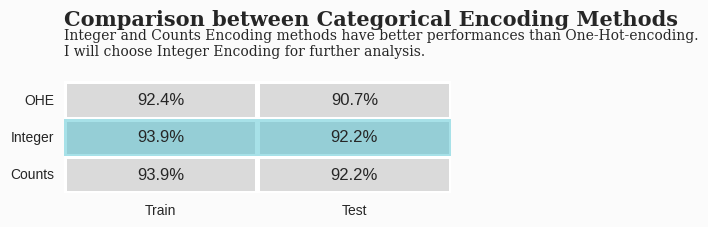

In [356]:
import matplotlib

fig = plt.figure(figsize=(5, 8))
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

colors = ['#DADADA', '#DADADA']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# change background color
background_color='#fbfbfb'
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)


# overall
#df_models = round(pd.concat([svc_df, dtree_df, rfc_df, tu_rfc_df, log_df, knn_df], axis=1), 3)

sns.heatmap(cat_encoding, cmap=colormap, annot=True, fmt=".1%", linewidths=2.5, cbar=False, ax=ax0)

ax0.tick_params(axis=u'both', which=u'both', length=0)
ax0.text(0, -1.5, 'Comparison between Categorical Encoding Methods', fontfamily='serif', fontsize=15, fontweight='bold')
ax0.text(0, -0.7, 'Integer and Counts Encoding methods have better performances than One-Hot-encoding.\nI will choose Integer Encoding for further analysis.',
        fontfamily='serif', fontsize=10)


from matplotlib.patches import Rectangle
rect = ax0.add_patch(Rectangle((0, 1), 5, 1, fill=True,color='#51C4D3', edgecolor='white', lw=0,alpha=0.5))

plt.show()

###### Conclusion
I performed one-hot-encoding, label encoding and count encoding for cateogrical variables to explore which technique is good for this dataset.

Given the results above, label encoding or count encoding is the best for this. I will use Integer Encoding method in the further analysis.

##### Variable Transformations for Numerical variables
Earlier I found that some numerical variables do not have gaussian distributions, so using transformation methods might help improve model performances because it helps improve value spread.

Based on the previous analysis, there are 5 continuous variables which are skewed distributions: Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Trans_Amt, Avg_Utilization_Ratio.

In [357]:
# create skewed variable list
skewed = ['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 
          'Total_Trans_Amt', 'Avg_Utilization_Ratio']

##### yeo-johnson transformation

In [358]:
use_cols = skewed + ['Churn']

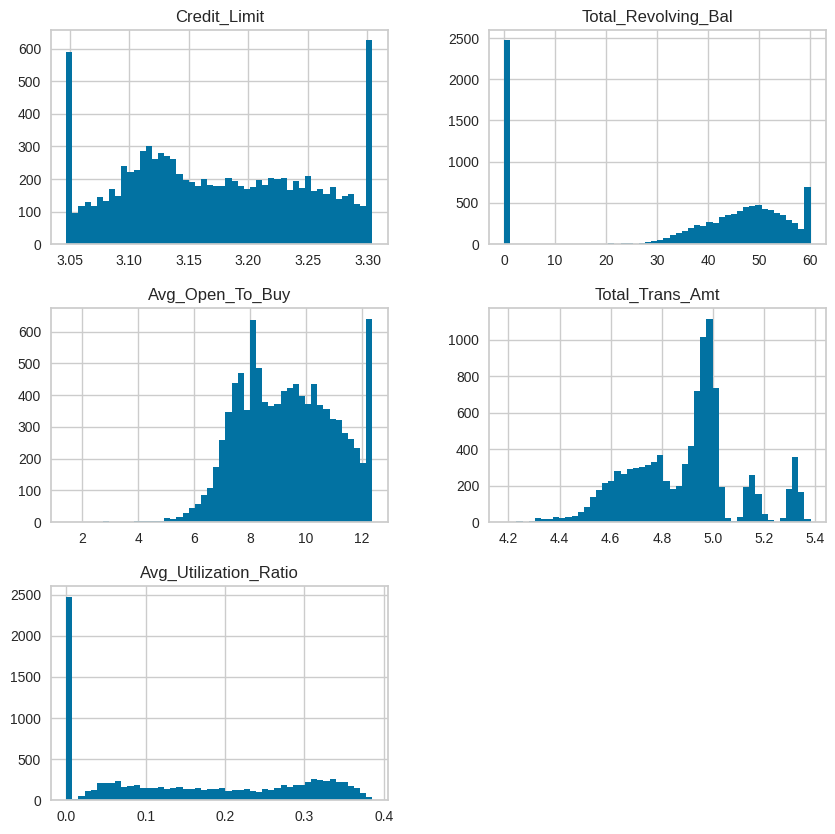

In [359]:
# temporary copy of the data
transformed = df[use_cols]

for var in skewed:
    
    # transform the variable - yeo-johnson
    transformed[var], param = stats.yeojohnson(df[var])
    
# plot the histogram of the transformed variables
transformed[skewed].hist(bins=50, figsize=(10,10))
plt.show()

We can say some variables (credit_limit, and Avg_Open_To_Buy) improved its distribution. To determin if this is the case, we can compare the model performances between original and transformed data.

In [360]:
# create original data with skewed variables
original = df[use_cols]
original.head(2)

,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Avg_Utilization_Ratio,Churn
0,12691.0,777,11914.0,1144,0.061,Exist
1,8256.0,864,7392.0,1291,0.105,Exist


In [361]:
# separate train and test set for original data
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    original.drop(['Churn'], axis=1),
    original['Churn'],
    test_size=0.2,
    random_state=0)

In [362]:
# separate train and test set for transformed data
X_train_transform, X_test_transform, y_train_transform, y_test_transform = train_test_split(
    transformed.drop(['Churn'], axis=1),
    transformed['Churn'],
    test_size=0.2,
    random_state=0)

In [363]:
run_RFs(X_train_original, X_test_original, y_train_original, y_test_original)

Train set
Random Forests roc-auc: 0.8980773365172281
Test set
Random Forests roc-auc: 0.8772959534674198


(0.8980773365172281, 0.8772959534674198)

In [364]:
run_RFs(X_train_transform, X_test_transform, y_train_transform, y_test_transform)

Train set
Random Forests roc-auc: 0.8980975826158273
Test set
Random Forests roc-auc: 0.8772959534674198


(0.8980975826158273, 0.8772959534674198)

###### Conclusions
Given the comparison between original dataset and transformed dataset, variable transformations did not improve model performances. Therefore, I would not use transformation methods unless I use linear models.

##### Feature Scaling
Feature scaling is important because similar scales help machine learning models decrease the time to learn data. Also, some machine learning models (e.g. linear models, SVM) are sensitive to the scale of the variable.

I will perform several feature scaling techniques, and explore which feature scaling method is the best for this dataset.

In [365]:
num_vars

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [366]:
# numeric features and target list
use_cols = num_vars + ['Churn']

# copy data
tmp = df[use_cols]
tmp.head(2)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,Exist
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,Exist


In [367]:
X_train, X_test, y_train, y_test = train_test_split(
    tmp.drop(['Churn'], axis=1), #predictors
    tmp['Churn'], # target
    test_size=0.2, # the percentage of test size
    random_state=0, # for reproducibility
)

X_train.shape, X_test.shape 

((8101, 14), (2026, 14))

##### Standardization
Standardization involves centering the variable at zero, and standardizing the variance to 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation.

The shape of a standardized distribution will be identical to the original distribution of the variable. If the original distribution is normal, then the standardized distribution will be normal. But, if the original distribution is skewed, then the standarized distribution of the varialbe will also be skewed. Thus, standardizing a variable does not normalize the distribution of the data.

In [368]:
# copy dataset
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# set up the scaler
standard_scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
standard_scaler.fit(X_train_stand)

# transform train and test set
X_train_stand = standard_scaler.transform(X_train_stand)
X_test_stand = standard_scaler.transform(X_test_stand)

In [369]:
# transform the returned Numpy arrays to dataframes 
X_train_stand = pd.DataFrame(X_train_stand, columns=X_train.columns)
X_test_stand = pd.DataFrame(X_test_stand, columns=X_test.columns)

##### Mean normalization
Mean normalization involves centering the variable at zero, and re-scaling to the value range. The procedure involves subtracting the mean of each observation and then dividing by difference between the minimum and maximum value.

Like standardization, this technique will not normalize the distribution of the data.

In [370]:
# copy dataset
X_train_mean = X_train.copy()
X_test_mean = X_test.copy()

# set up the StandardScaler so that it removes the mean
# but does not divide by the standard deviation
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# set up the robustscaler so that it does NOT remove the median
# but normalizes by max()-min(), importnat for this to set up
# the quantile range to 0 and 100, which represent the min and max values
scaler_minmax = RobustScaler(with_centering=False,
                            with_scaling=True,
                            quantile_range=(0,100))

# fit the scalers to the train set, it will learn the parameters
scaler_mean.fit(X_train_mean)
scaler_minmax.fit(X_train_mean)

# transform train and test sets
X_train_mean = scaler_minmax.transform(scaler_mean.transform(X_train_mean))
X_test_mean = scaler_minmax.transform(scaler_mean.transform(X_test_mean))

In [371]:
# create dataframe
X_train_mean = pd.DataFrame(X_train_mean, columns=X_train.columns)
X_test_mean = pd.DataFrame(X_test_mean, columns=X_test.columns)

##### MinMaxScaling
Minimum and maximum scaling squeezes the vales between 0 and 1. The result of the transformation is a distribution which values vary within the range of 0 to 1. But the mean is not centered at zero and the standard deviation varies across variables. The shpae of a min-max scaled distribution will be similar to the original variable. This scaling technique is also sensitive to outliers.

In [372]:
# copy dataset
X_train_minmax = X_train.copy()
X_test_minmax = X_test.copy()

# set up scaler
scaler_minmax = MinMaxScaler()


# fit the scalers to the train set, it will learn the parameters
scaler_minmax.fit(X_train_minmax)


# transform train and test sets
X_train_minmax = scaler_minmax.transform(scaler_minmax.transform(X_train_minmax))
X_test_minmax = scaler_minmax.transform(scaler_minmax.transform(X_test_minmax))

In [373]:
# create dataframe

X_train_minmax = pd.DataFrame(X_train_minmax, columns=X_train.columns)
X_test_minmax = pd.DataFrame(X_test_minmax, columns=X_test.columns)

##### MaxAbsScaling
Maximum Absolute Scaling transforms the data to its absolute maximum value. The result is distributed which values vary within the range of -1 to 1. But the mean is not centered as zero and the standard deviation varies across variables.

This may not preserve the shape of the original distribution and it is sensitive outliers.

In [374]:
# copy dataset
X_train_maxabs = X_train.copy()
X_test_maxabs = X_test.copy()

# set up the scale
scaler_maxabs = MaxAbsScaler()

# fit the train set
scaler_maxabs.fit(X_train_maxabs)

# transform
X_train_maxabs = scaler_maxabs.transform(X_train)
X_test_maxabs = scaler_maxabs.transform(X_test)

In [375]:
# create dataframe
X_train_maxabs = pd.DataFrame(X_train_maxabs, columns=X_train.columns)
X_test_maxabs = pd.DataFrame(X_test_maxabs, columns=X_test.columns)

##### RobustScaling
RobustScaling removes the median from the observations and then scaled to the inter-quantile range (IQR). This produces more robust estimates for the center and range of the variable, and is recommended if the data shows outliers (and our dataset has outliers).

It may not preserve the shape of the original distribution, and the minimum and maximum values vary, but is robust outliers.

In [376]:
# copy dataset
X_train_robust = X_train.copy()
X_test_robust = X_test.copy()

# set up the scaler
scaler_robust = RobustScaler()

# fit training set
scaler_robust.fit(X_train_robust)

# transform
X_train_robust = scaler_robust.transform(X_train_robust)
X_test_robust = scaler_robust.transform(X_test_robust)

# save as dataframe
X_train_robust = pd.DataFrame(X_train_robust, columns=X_train.columns)
X_test_robust = pd.DataFrame(X_test_robust, columns=X_test.columns)

#### Evaluate model performances based on different feature scaling methods

In [377]:
feature_scaling = {"Original": run_RFs(X_train, X_test, y_train, y_test),
                   "Standardization": run_RFs(X_train_stand, X_test_stand, y_train, y_test),
                   "MeanNormalization": run_RFs(X_train_mean, X_test_mean, y_train, y_test),
                   "MinMaxScaling": run_RFs(X_train_minmax, X_test_minmax, y_train, y_test),
                   "MaxAbsScaling": run_RFs(X_train_maxabs, X_test_maxabs, y_train, y_test),
                   "RobustScaling": run_RFs(X_train_robust, X_test_robust, y_train, y_test)
                  }

Train set
Random Forests roc-auc: 0.9406386626210265
Test set
Random Forests roc-auc: 0.9238426698180955
Train set
Random Forests roc-auc: 0.9406363136261613
Test set
Random Forests roc-auc: 0.9238332456889321
Train set
Random Forests roc-auc: 0.940634859486483
Test set
Random Forests roc-auc: 0.9238426698180954
Train set
Random Forests roc-auc: 0.9355919590102634
Test set
Random Forests roc-auc: 0.9158293327905035
Train set
Random Forests roc-auc: 0.9406368729106531
Test set
Random Forests roc-auc: 0.9238389001664301
Train set
Random Forests roc-auc: 0.9406360899123646
Test set
Random Forests roc-auc: 0.9238445546439281


In [378]:
feature_scaling = pd.DataFrame(feature_scaling, index=['Train', 'Test']).T

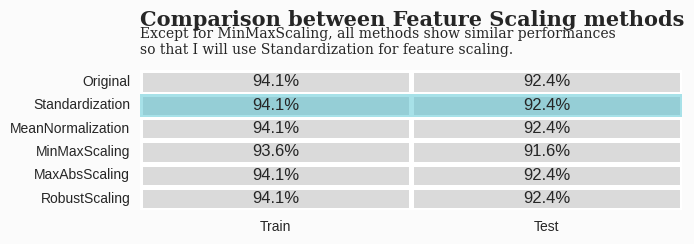

In [379]:
import matplotlib

fig = plt.figure(figsize=(7, 10))
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

colors = ['#DADADA', '#DADADA']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# change background color
background_color='#fbfbfb'
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)


# overall

sns.heatmap(feature_scaling, cmap=colormap, annot=True, fmt=".1%", linewidths=2.5, cbar=False, ax=ax0)

ax0.tick_params(axis=u'both', which=u'both', length=0)
ax0.text(0, -1.9, 'Comparison between Feature Scaling methods', fontfamily='serif', fontsize=15, fontweight='bold')
ax0.text(0, -0.7, 'Except for MinMaxScaling, all methods show similar performances \nso that I will use Standardization for feature scaling.',
        fontfamily='serif', fontsize=10)


from matplotlib.patches import Rectangle
rect = ax0.add_patch(Rectangle((0, 1), 5, 1, fill=True,color='#51C4D3', edgecolor='white', lw=0,alpha=0.5))

plt.show()

###### Conclusion
I tried to compare several feature scaling methods and 5 methods show similar performances except for MinMaxScaling.

Therefore, I will use Standardization for feature scaling.

##### Feature Importance
Finally, I would like to explore what predictors are important to build a model.

In [380]:
# function to show feature importance
def feat_importance(model, data):
    return pd.DataFrame({"cols": data.columns, 
                        "imp": model.feature_importances_}
                       ).sort_values(by='imp', ascending=False)

In order to see the feature importance, we need to build a random forest model. I will perform as follows:

Separate into train and test set
Encoding categorical variables using integer encoding
Scaling features using StandardScaler
Builing a random forest model
Seeing feature importance

In [381]:
# separate train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Churn'], axis=1),
    df['Churn'],
    test_size=0.2,
    random_state=0
)

# integer encoding
ordinal_encoding = ce.OrdinalEncoder(
    encoding_method='arbitrary',
    variables=cat_vars
)

ordinal_encoding.fit(X_train)
X_train = ordinal_encoding.transform(X_train)
X_test = ordinal_encoding.transform(X_test)


# StandardScaler
standard_scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(standard_scaler.transform(X_train),
                       columns=X_train.columns)
X_test = pd.DataFrame(standard_scaler.transform(X_test),
                      columns=X_test.columns)

In [382]:
# set up rf model
rf_model = RandomForestClassifier(n_estimators=40, random_state=42, max_depth=3)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=40, random_state=42)

In [383]:
feat_importance(rf_model, X_train)

,cols,imp
16,Total_Trans_Ct,0.228610
15,Total_Trans_Amt,0.210761
17,Total_Ct_Chng_Q4_Q1,0.170630
12,Total_Revolving_Bal,0.161360
18,Avg_Utilization_Ratio,0.075051
14,Total_Amt_Chng_Q4_Q1,0.048285
8,Total_Relationship_Count,0.038576
9,Months_Inactive_12_mon,0.023023
10,Contacts_Count_12_mon,0.014908
11,Credit_Limit,0.014257


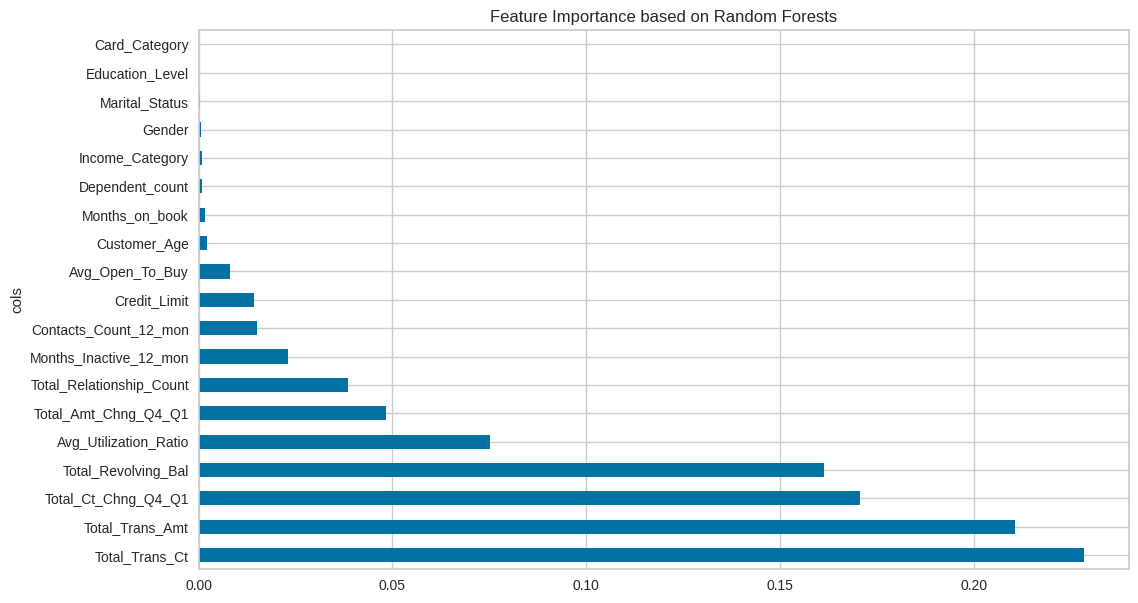

In [384]:
feat_importance(rf_model, X_train).plot('cols', 'imp', 'barh',
                                       figsize=(12, 7), legend=False)
plt.title("Feature Importance based on Random Forests");

Total_Trans_Ct is the most important feature to build a model. The bottom 5 shows negligible importance on building a mode

###### Over-Sampling

- I will use oversampling methods to make dataset balance so that it can help improve model performances.

- The dataset is an imbalanced data which have more instances of certain classes than of others. So, there is  need to deal with this very carefully.

- Even though there are a lot of sampling balancing methods (e.g., under-sampling, ensemble sampling), I would like to choose one of the oversampling methods, because I won't lose data by performing over-sampling.

In [385]:
from collections import Counter

In [386]:
# Data pre-processing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Modelling 
from sklearn.metrics import (
    roc_auc_score,
    precision_score, 
    accuracy_score, 
    recall_score,
)

from sklearn.ensemble import RandomForestClassifier


# for feature engineering
from feature_engine import encoding as ce

# Evaluation & CV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score


# pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


# for oversampling
# for the model 
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline

# for feature engineering
from feature_engine import encoding as ce

# for oversampling
from sklearn.svm import SVC
from imblearn.over_sampling import (
    RandomOverSampler,
    SMOTE,
    ADASYN,
    BorderlineSMOTE,
    SVMSMOTE
)

# for cross-validation
from imblearn.pipeline import make_pipeline

In [387]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [388]:
def run_RFs(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=40, random_state=42, max_depth=3)
    rf.fit(X_train, y_train)
    
    print("Train set")
    train_pred = rf.predict_proba(X_train)
    print("Random Forests roc-auc: {}".format(roc_auc_score(y_train, train_pred[:,1])))
    
    print("Test set")
    test_pred = rf.predict_proba(X_test)
    print("Random Forests roc-auc: {}".format(roc_auc_score(y_test, test_pred[:, 1])))
    
    return roc_auc_score(y_train, train_pred[:,1]), roc_auc_score(y_test, test_pred[:, 1])

###### Over-sampling methods
All oversampling methods create new synthetic data from the minority label so that it helps balance data distribution.

We will try to compare 5 other methods based on the model performances, and choose one of them.

RandomOverSampler
SMOTE
ADASYN
BorderlineSMOTE
SVMSMOTE
First, we need to create oversampler dictionary.

In [389]:
oversampler_dict = {
    
    'random': RandomOverSampler(
        sampling_strategy='auto',
        random_state=0),
    
    'smote': SMOTE(
        sampling_strategy='auto', # samples only the minority class
        random_state=0,
        k_neighbors=5,
        n_jobs=1),
    
    'adasyn': ADASYN(
        sampling_strategy='auto', # samples only the minority class
        random_state=0,
        n_neighbors=5,
        n_jobs=1),
    
    'border1': BorderlineSMOTE(
        sampling_strategy='auto', # samples only the minority class
        random_state=0,
        k_neighbors=5,
        m_neighbors=10,
        kind='borderline-1',
        n_jobs=1),
    
    'svm': SVMSMOTE(
        sampling_strategy='auto', # samples only the minority class
        random_state=0,
        k_neighbors=5,
        m_neighbors=10,
        n_jobs=1,
        svm_estimator=SVC(kernel='linear')),
}

In [390]:
# to save the results
results_dict_over = {}
shapes_dict_over = {}

roc = run_RFs(X_train, X_test, y_train, y_test)

# store results
results_dict_over['full_data'] = roc
shapes_dict_over['full_data'] = len(X_train)


print()

for oversampler in oversampler_dict.keys():
    
    print(oversampler)
    
    # resample
    X_resampled, y_resampled = oversampler_dict[oversampler].fit_resample(X_train, y_train)
    
    # evaluate performance
    roc = run_RFs(X_resampled, X_test, y_resampled, y_test)
    
    # store results
    results_dict_over[oversampler] = roc
    shapes_dict_over[oversampler] = len(X_resampled)
    print()
    
print()


Train set
Random Forests roc-auc: 0.9391798249529026
Test set
Random Forests roc-auc: 0.921798576202566

random
Train set
Random Forests roc-auc: 0.9387144570499972
Test set
Random Forests roc-auc: 0.9208194091824945

smote
Train set
Random Forests roc-auc: 0.9530338342495762
Test set
Random Forests roc-auc: 0.9265718976237999

adasyn
Train set
Random Forests roc-auc: 0.9469218906792373
Test set
Random Forests roc-auc: 0.9354352911019258

border1
Train set
Random Forests roc-auc: 0.9504508228798011
Test set
Random Forests roc-auc: 0.9337248116587787

svm
Train set
Random Forests roc-auc: 0.9494488578115512
Test set
Random Forests roc-auc: 0.9264738866805013




In [391]:
results_dict_over_df = pd.DataFrame(results_dict_over, index=['Train', 'Test']).T

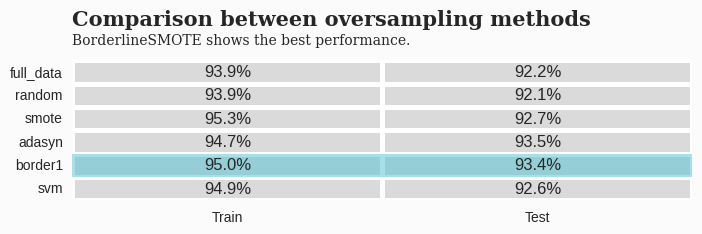

In [392]:
import matplotlib

fig = plt.figure(figsize=(8, 10))
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

colors = ['#DADADA', '#DADADA']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# change background color
background_color='#fbfbfb'
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)


# overall
#df_models = round(pd.concat([svc_df, dtree_df, rfc_df, tu_rfc_df, log_df, knn_df], axis=1), 3)

sns.heatmap(results_dict_over_df, cmap=colormap, annot=True, fmt=".1%", linewidths=2.5, cbar=False, ax=ax0)

ax0.tick_params(axis=u'both', which=u'both', length=0)
ax0.text(0, -1.5, 'Comparison between oversampling methods', fontfamily='serif', fontsize=15, fontweight='bold')
ax0.text(0, -0.7, 'BorderlineSMOTE shows the best performance.',
        fontfamily='serif', fontsize=10)


from matplotlib.patches import Rectangle
#rect = ax0.add_patch(Rectangle((0, 2), 5, 1, fill=True,color='#51C4D3', edgecolor='white', lw=0,alpha=0.5))
rect = ax0.add_patch(Rectangle((0, 4), 5, 1, fill=True,color='#51C4D3', edgecolor='white', lw=0,alpha=0.5))


plt.show()

In [393]:
# function to train random forests and evaluate the performance
# with cross-validation

def run_model(X_train, y_train, oversampler=None):
    
    # set up the classifier
    rf = RandomForestClassifier(
            n_estimators=40, random_state=39, max_depth=3, n_jobs=1
        )
    
    
    # without sampling:
    if not oversampler:

        model = rf
    
    # set up a pipeline with sampling:
    else:
        
        # important to scale before the re-sampler
        # as the many of methods require the variables in 
        # a similar scale
        model = make_pipeline(
            oversampler,
            rf,
        )
        
          
    # When we make a pipeline and then run the training of the model
    # with cross-validation, the procedure works as follows:
    
    # 1) take 2 of the 3 fold as train set
    # 2) resample the 2 fold (aka, the train set)
    # 3) train the model on the resampled data from point 2
    # 4) evaluate performance on the 3rd fold, that was not resampled
    
    # this way, we make sure that we are not evaluating the performance
    # of our classifier on the over-sampled data
    
    cv_results = cross_validate(
        model, # the random forest or the pipeline
        X_train, # the data that will be used in the cross-validation
        y_train, # the target
        scoring="roc_auc", # the metric that we want to evaluate
        cv=3, # the cross-validation fold
    )

    #print(
    #    'Random Forests average precision: {0} +/- {1}'.format(
    #    cv_results['test_score'].mean(), cv_results['test_score'].std()
    #    )
    #)
    
    print('RF roc-auc: {}'.format(cv_results['test_score']))

    return cv_results['test_score'] 

In [394]:
# now we train several models, with the different oversamplers 
# and with cross-validation

# to save the results
roc_dict = {}


# train model on data with re-sampling with cross-validation
test_score = run_model(X_train, y_train)

# store results

roc_dict['full_data'] = test_score

print()


for oversampler in oversampler_dict.keys():
    
    print(oversampler)
    
    # resample, train and evaluate performance
    # with cross-validation
    test_score = run_model(X_train, y_train, oversampler_dict[oversampler])
    
    # store results
    roc_dict[oversampler] = test_score

    print()
    
print()

RF roc-auc: [0.93687829 0.9267348  0.9385802 ]

random
RF roc-auc: [0.92964698 0.93171677 0.93426115]

smote
RF roc-auc: [0.93244793 0.93014007 0.93701761]

adasyn
RF roc-auc: [0.93771712 0.94160314 0.94486988]

border1
RF roc-auc: [0.93677777 0.93749112 0.94873607]

svm
RF roc-auc: [0.92750191 0.93016929 0.93396445]




In [395]:
roc_dict_df = pd.DataFrame(roc_dict, index=['fold1', 'fold2', 'fold3']).T

# calculate the average of test scores
roc_dict_df['mean'] = (roc_dict_df['fold1']+roc_dict_df['fold2']+roc_dict_df['fold3'])/3

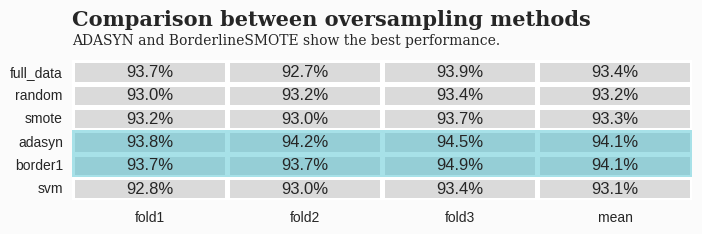

In [396]:
import matplotlib

fig = plt.figure(figsize=(8, 10))
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

colors = ['#DADADA', '#DADADA']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# change background color
background_color='#fbfbfb'
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)


# overall
#df_models = round(pd.concat([svc_df, dtree_df, rfc_df, tu_rfc_df, log_df, knn_df], axis=1), 3)

sns.heatmap(roc_dict_df, cmap=colormap, annot=True, fmt=".1%", linewidths=2.5, cbar=False, ax=ax0)

ax0.tick_params(axis=u'both', which=u'both', length=0)
ax0.text(0, -1.5, 'Comparison between oversampling methods', fontfamily='serif', fontsize=15, fontweight='bold')
ax0.text(0, -0.7, 'ADASYN and BorderlineSMOTE show the best performance.',
        fontfamily='serif', fontsize=10)


from matplotlib.patches import Rectangle
rect = ax0.add_patch(Rectangle((0, 3), 5, 1, fill=True,color='#51C4D3', edgecolor='white', lw=0,alpha=0.5))
rect = ax0.add_patch(Rectangle((0, 4), 5, 1, fill=True,color='#51C4D3', edgecolor='white', lw=0,alpha=0.5))


plt.show()

##### Conclusions
I compared 5 different oversampling methods, and I found ADASYN and BorderlineSMOTE show the best performances.

I will use ADASYN to balance data when building pipeline for models.

#### Building Model Pipeline

In [397]:
# for feature engineering
from feature_engine import encoding as ce

# Evaluation & CV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import (
    KFold,
    cross_val_score,
    RepeatedStratifiedKFold)


# pipeline
from sklearn.pipeline import Pipeline

# for oversampling
from imblearn.over_sampling import ADASYN, SMOTE

# since sklearn pipeline doesn't work well with oversampling 
# we need to use imblearn package's pipeline
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as imbPipeline

# for hyperparameter tuning
import optuna

In [398]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [399]:
cat_vars

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [400]:
df

,Churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Exist,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Exist,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Exist,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Exist,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Exist,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Exist,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Churn,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Churn,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Churn,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


##### ML Comparison
Here, I will compare 6 different machine learning algorithms based on the performances, and I will choose best 3 models later.

Let's write machine learning pipeline.

In [423]:
# Read in data into a dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BankChurners.csv')


In [425]:
# drop unuseful columns 
df.drop(['CLIENTNUM'],axis=1, inplace=True)

df.shape

(10127, 20)

In [426]:
# change the string values of target to integer value
churn_map = {'Existing Customer': 0,
            'Attrited Customer': 1}
df['Attrition_Flag'] = df['Attrition_Flag'].map(churn_map)

In [427]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Attrition_Flag'], axis=1),
    df['Attrition_Flag'],
    test_size=0.2, 
    random_state=0)

X_train.shape, X_test.shape

((8101, 19), (2026, 19))

In [428]:
# categorical encoding
cat_encoding = ce.OrdinalEncoder(
    encoding_method='arbitrary', variables=cat_vars)

X_train = cat_encoding.fit_transform(X_train)
X_test = cat_encoding.transform(X_test)

# feature scaling
scaler = StandardScaler()

X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_train.columns)


# oversampling
oversampling = ADASYN(
    sampling_strategy='auto', # samples only the minority class
        random_state=0,
        n_neighbors=5,
        n_jobs=1)

X_resampled, y_resampled = oversampling.fit_resample(X_train, y_train)

In [429]:
# new resampled X_train and y_train
X_resampled.shape, y_resampled.shape

((13689, 19), (13689,))

In [432]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    criterion = trial.suggest_categorical("criterion", ['squared_error', 'friedman_mse'])
    max_depth = trial.suggest_int("max_depth", 1, 11)
    min_samples_split = trial.suggest_float("min_samples_split", 0.01, 1)
    max_features = trial.suggest_categorical("features", ['sqrt', 'log2'])
    learning_rate = trial.suggest_float("learning_rate", 0.0001, 0.1)
    
    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        max_features=max_features,
        learning_rate=learning_rate
    )
    
    score = cross_val_score(model, X_resampled, y_resampled, cv=3, scoring='roc_auc')
    accuracy = score.mean()
    return accuracy

In [418]:
models = [
    ('LR', LogisticRegression(max_iter=1000)),
    ('SVC', SVC(kernel='rbf', C=0.025, probability=True)),
    ('KNN', KNeighborsClassifier(n_neighbors=2)),
    ('RF', RandomForestClassifier()),
    ('ADA', AdaBoostClassifier()),
    ('GBM', GradientBoostingClassifier())
]




In [419]:
path = Path('/content/drive/MyDrive/Colab Notebooks')

In [468]:
# create an empty list to store the names of the models
fnames = []

# loop through each model in the list of models
for name, model in models:
    ''' create a scikit-learn pipeline with three steps:

     1. an encoder to transform categorical variables into integers

     2. a scaler to standardize the numerical features

     3. the model itself  '''
    
    pipe = Pipeline([
        # Integer Encoding for Categorical Variable
        ('encoding', ce.OrdinalEncoder(
            encoding_method='arbitrary', variables=cat_vars)),

        # Feature Scaling
        ('scaler', StandardScaler()),
    

        # models
        ('classifier', model) 
    ])
    
    # fit the pipeline to the training data
    pipe.fit(X_train, y_train)
    
    # use the pipeline to make predictions on the test data
    pipe_prediction = pipe.predict(X_test)

     # create a pandas DataFrame with the evaluation metrics for the model
    ml_data = pd.DataFrame(data=[accuracy_score(y_test, pipe_prediction),
                           recall_score(y_test, pipe_prediction),
                           precision_score(y_test, pipe_prediction),
                           roc_auc_score(y_test, pipe_prediction)],
                     columns=[name + 'Score'],
                     index = ['Accuracy', 'Recall', 'Precision', 'roc-auc'])
   
    # save the evaluation metrics to a CSV file with the model name
    ml_data.to_csv(path/'{}.csv'.format(name))

    # add the model name to the list of names
    fnames.append(name)

In [411]:
print(fnames)

['LR', 'SVC', 'KNN', 'RF', 'ADA', 'GBM']


In [412]:
#fnames = ['LR', 'SVC', 'KNN', 'RF', 'ADA', 'GBM']

# create a list of DataFrames by reading in the CSV files for each model
table = [pd.read_csv(path/'{}.csv'.format(fname)) for fname in fnames]

# unpack the DataFrames into separate variables for each model (e.g. df_LR, df_SVC)
df_LR, df_SVC, df_KNN, df_RF, df_ADA, df_GBM = table

# create models_df that have matrix results

# concatenate the DataFrames along the columns axis to create a single DataFrame with all the evaluation metrics
models_df = pd.concat(table, axis=1)

# assign the evaluation metric names as the row index of the DataFra
models_df.index = ['Accuracy', 'Recall', 'Precision', 'ROC AUC score']

# drop the 'Unnamed: 0' column, which was added by default when the CSV files were saved
models_df.drop('Unnamed: 0', axis=1, inplace=True)

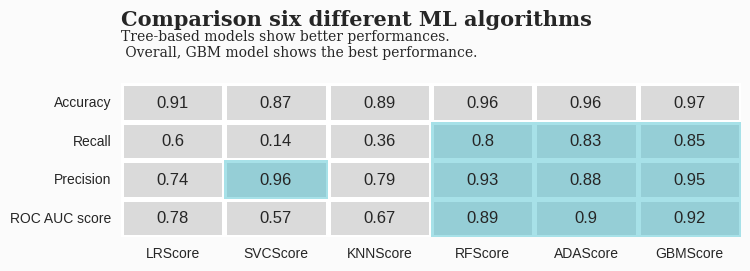

In [421]:
import matplotlib
from matplotlib.patches import Rectangle

# create a new figure with a size of 8 inches by 11 inches
fig = plt.figure(figsize=(8, 11))

# add a grid of subplots with 4 rows and 2 columns
gs = fig.add_gridspec(4, 2)

# set the horizontal and vertical spacing between the subplots
gs.update(wspace=0.1, hspace=0.5)

# add a subplot in the first row that spans both columns
ax0 = fig.add_subplot(gs[0, :])

# define a list of colors to use for the heatmap
colors = ['#DADADA', '#DADADA']

# create a colormap from the list of colors
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# set the background color of the figure and the first subplot
background_color='#fbfbfb'
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)


# overall
#df_models = round(pd.concat([svc_df, dtree_df, rfc_df, tu_rfc_df, log_df, knn_df], axis=1), 3)

sns.heatmap(models_df, cmap=colormap, annot=True, linewidths=2.5, cbar=False, ax=ax0)

# remove the ticks on the x and y axes
ax0.tick_params(axis=u'both', which=u'both', length=0)

# add a title to the first subplot
ax0.text(0, -1.5, 'Comparison six different ML algorithms', fontfamily='serif', fontsize=15, fontweight='bold')
ax0.text(0, -0.7, 'Tree-based models show better performances.\n Overall, GBM model shows the best performance.',
        fontfamily='serif', fontsize=10)



# add two rectangles to the first subplot to highlight certain cells in the heatmap
rect = ax0.add_patch(Rectangle((3, 1), 3, 3, fill=True,color='#51C4D3', edgecolor='white', lw=0,alpha=0.5))
rect2 = ax0.add_patch(Rectangle((1, 2), 1, 1, fill=True,color='#51C4D3', edgecolor='white', lw=0,alpha=0.5))

plt.show()

In [414]:
# categorical encoding
'''
1. create an instance of the OrdinalEncoder class from the category_encoders library

2.  use the 'arbitrary' encoding method, which maps each unique category to an arbitrary integer value

3.  apply the encoder to the categorical variables in the training and test sets

'''

cat_encoding = ce.OrdinalEncoder(
    encoding_method='arbitrary', variables=cat_vars)

X_train = cat_encoding.fit_transform(X_train)
X_test = cat_encoding.transform(X_test)

# feature scaling
'''
1. create an instance of the StandardScaler class from the scikit-learn library

2. use the fit_transform() method to standardize the numerical features in the training set

3. use the transform() method to standardize the numerical features in the test set, using the mean and standard deviation of the training set

'''

scaler = StandardScaler()

X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns)

X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_train.columns)


# oversampling

'''
1. create an instance of the ADASYN class from the imblearn library

2. use the 'auto' sampling strategy to oversample the minority class

3. set the random state to 0 for reproducibility

4. set the number of neighbors to 5

5. set the number of jobs to 1 to use a single CPU

'''

oversampling = ADASYN(
    sampling_strategy='auto', # samples only the minority class
        random_state=0,
        n_neighbors=5,
        n_jobs=1)

'''

1. apply the ADASYN oversampling method to the training set

2. the fit_resample() method returns the resampled X and y arrays as a tuple

'''

X_resampled, y_resampled = oversampling.fit_resample(X_train, y_train)

In [415]:
# new resampled X_train and y_train
X_resampled.shape, y_resampled.shape

((13619, 20), (13619,))

###### Hyperparater tuning with Optuna

In [416]:
def objective(trial):
    '''
    function used to define the hyperparameter search space for the 
    gradient boosting classifier model using the 
    study.optimize() method of the Optuna library.

    1.The suggest_int() method of the trial object is used  to sample an integer value for the number of estimators

    2. The n_estimators parameter controls the number of decision trees in the gradient boosting model
    
    3. The suggest_categorical() method of the trial object is used to sample a categorical value for the splitting criterion

    4. The criterion parameter controls the function to measure the quality of a split in the decision tree

    5. The suggest_int() method of the trial object is used to sample an integer value for the maximum depth of the decision trees
     the max_depth parameter controls the maximum depth of the decision trees in the gradient boosting model

    6. The suggest_float() method of the trial object is used  to sample a float value for the minimum number of samples required to split an internal node
      and the min_samples_split parameter controls the minimum number of samples required to split an internal node in the decision trees

    7. The suggest_categorical() method of the trial object is used to sample a categorical value for the maximum number of features to consider when 
       looking for the best split and the max_features parameter controls the number of features to consider when looking for the best split in each decision tree
 
    8. The suggest_float() method of the trial object is used to sample a float value for the learning rate
        and the learning_rate parameter controls the contribution of each tree to the final prediction in the gradient boosting model


    9. Create an instance of the GradientBoostingClassifier class from the scikit-learn library
        and use the hyperparameters sampled from the trial object to configure the model

    10. Use the cross_val_score() function from the scikit-learn library to perform cross-validation on the resampled training set
        and the scoring parameter is set to 'roc_auc' to evaluate the model's performance using the area under the receiver operating characteristic curve (ROC AUC)

    

    '''
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    criterion = trial.suggest_categorical("criterion", ['squared_error', 'friedman_mse'])
    max_depth = trial.suggest_int("max_depth", 1, 11)
    min_samples_split = trial.suggest_float("min_samples_split", 0.01, 1)
    max_features = trial.suggest_categorical("features", ['sqrt', 'log2'])
    learning_rate = trial.suggest_float("learning_rate", 0.0001, 0.1)
    
    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        max_features=max_features,
        learning_rate=learning_rate
    )
    
    score = cross_val_score(model, X_resampled, y_resampled, cv=3, scoring='roc_auc')

    # calculate the mean accuracy score across the three cross-validation folds
    accuracy = score.mean()

    # return the accuracy score as the value of the functio
    return accuracy

In [433]:
study = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.RandomSampler()
)

study.optimize(objective, n_trials=100)

[I 2023-05-18 11:33:44,248] A new study created in memory with name: no-name-25d20088-8876-4727-a76c-acb883324f1e
[I 2023-05-18 11:33:56,324] Trial 0 finished with value: 0.9802899439532545 and parameters: {'n_estimators': 407, 'criterion': 'friedman_mse', 'max_depth': 4, 'min_samples_split': 0.2815916821774848, 'features': 'sqrt', 'learning_rate': 0.009225076487059204}. Best is trial 0 with value: 0.9802899439532545.
[I 2023-05-18 11:34:26,231] Trial 1 finished with value: 0.997752596854737 and parameters: {'n_estimators': 903, 'criterion': 'friedman_mse', 'max_depth': 7, 'min_samples_split': 0.331976773217548, 'features': 'log2', 'learning_rate': 0.08008992880789255}. Best is trial 1 with value: 0.997752596854737.
[I 2023-05-18 11:34:37,271] Trial 2 finished with value: 0.9903447226437332 and parameters: {'n_estimators': 761, 'criterion': 'friedman_mse', 'max_depth': 6, 'min_samples_split': 0.8342665407139704, 'features': 'log2', 'learning_rate': 0.05390842506674035}. Best is trial 1

In [435]:
study.best_params

{'n_estimators': 864,
 'criterion': 'squared_error',
 'max_depth': 9,
 'min_samples_split': 0.06092482583512375,
 'features': 'log2',
 'learning_rate': 0.04490256642285633}

In [436]:
study.best_value

0.9985598610929122

In [437]:
study.trials_dataframe().sort_values(by='value', ascending=False).head(10)

,number,value,datetime_start,datetime_complete,duration,params_criterion,params_features,params_learning_rate,params_max_depth,params_min_samples_split,params_n_estimators,state
59,59,0.998560,2023-05-18 11:45:04.607235,2023-05-18 11:45:56.116909,0 days 00:00:51.509674,squared_error,log2,0.044903,9,0.060925,864,COMPLETE
69,69,0.998347,2023-05-18 11:47:33.427906,2023-05-18 11:47:57.959944,0 days 00:00:24.532038,squared_error,sqrt,0.047966,6,0.018725,524,COMPLETE
53,53,0.998318,2023-05-18 11:43:53.000232,2023-05-18 11:44:22.110566,0 days 00:00:29.110334,squared_error,log2,0.095783,11,0.154948,582,COMPLETE
36,36,0.998117,2023-05-18 11:40:54.452101,2023-05-18 11:41:13.185209,0 days 00:00:18.733108,squared_error,log2,0.076864,8,0.148086,424,COMPLETE
11,11,0.998084,2023-05-18 11:35:58.390139,2023-05-18 11:36:29.370081,0 days 00:00:30.979942,squared_error,sqrt,0.098745,4,0.055098,972,COMPLETE
21,21,0.998057,2023-05-18 11:37:50.665294,2023-05-18 11:38:22.975792,0 days 00:00:32.310498,squared_error,log2,0.061127,5,0.162809,899,COMPLETE
94,94,0.998052,2023-05-18 11:52:53.706509,2023-05-18 11:53:28.489225,0 days 00:00:34.782716,friedman_mse,log2,0.085016,7,0.203266,850,COMPLETE
88,88,0.997799,2023-05-18 11:51:27.198362,2023-05-18 11:52:00.959223,0 days 00:00:33.760861,squared_error,sqrt,0.041202,8,0.257407,878,COMPLETE
1,1,0.997753,2023-05-18 11:33:56.325703,2023-05-18 11:34:26.230464,0 days 00:00:29.904761,friedman_mse,log2,0.080090,7,0.331977,903,COMPLETE
4,4,0.997722,2023-05-18 11:34:40.839657,2023-05-18 11:35:04.840974,0 days 00:00:24.001317,friedman_mse,sqrt,0.066069,8,0.311609,678,COMPLETE


### Pipeline for GBM model

In [453]:
# Read in data into a dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BankChurners.csv')

In [454]:
# drop unuseful columns 
df.drop(['CLIENTNUM'],
        axis=1, inplace=True)

df.shape

(10127, 20)

In [455]:
# change y value (0,1)
churn_map = {'Existing Customer': 0,
            'Attrited Customer': 1}
df['Attrition_Flag'] = df['Attrition_Flag'].map(churn_map)

# separate into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Attrition_Flag'], axis=1),
    df['Attrition_Flag'],
    test_size=0.2,
    random_state=0
)

X_train.shape, X_test.shape

((8101, 19), (2026, 19))

In [456]:
# this is the best paramter we found 
# in hyperparater tuning notebook

# set the paramters
best_param = {
    'n_estimators': 864,
    'criterion': 'squared_error',
    'max_depth': 9,
    'min_samples_split': 0.06092482583512375,
    'max_features': 'log2',
    'learning_rate': 0.04490256642285633

}



In [457]:
model_pipe = imbPipeline([
    
    # categorical encoding 
    ("cat_encoding", ce.OrdinalEncoder(
        encoding_method='arbitrary', variables=cat_vars)),
    
    # feature scaling
    ("scale", StandardScaler()),
    
    # oversampling with ADASYN
    ("oversampling", ADASYN(sampling_strategy='auto', random_state=0, n_neighbors=5)),
    
    # classifier
    ("gbm", GradientBoostingClassifier(**best_param))
])

In [458]:
# set up multiple scoring
scoring = {'accuracy': 'accuracy',
           'recall': 'recall_macro',
           'precision': 'precision_macro',
           'roc-auc': 'roc_auc'}

In [460]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
scores = cross_validate(model_pipe, X_train, y_train, scoring=scoring, 
                        cv=cv, n_jobs=-1)



In [461]:
print(scores.keys())

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_recall', 'test_precision', 'test_roc-auc'])


In [462]:
# create scores as dataframe
scores_df = pd.DataFrame(pd.Series(scores))

# set column name
scores_df.columns = ['scores']

# create an empty column 
scores_df['GBM_with_best_params'] = np.NaN

# create a column showing the average of scores
for i in range(len(scores_df)):
    scores_df['GBM_with_best_params'][i] = scores_df['scores'][i].mean()
    
# drop unuseful columns
scores_df.drop(['scores'], axis=1, inplace=True)

scores_df = scores_df.T
scores_df.drop(['fit_time', 'score_time'], axis=1, inplace=True)

# change index names in order to combine this with baseline GBM scores
scores_df = scores_df.T
scores_df.index = ['Accuracy', 'Recall', 'Precision', 'ROC AUC score']
scores_df

,GBM_with_best_params
Accuracy,0.971527
Recall,0.942341
Precision,0.952377
ROC AUC score,0.993100


In [463]:
# Combine baseline's GBMscores and new GBM scores
new_df = pd.concat([models_df['GBMScore'], scores_df], axis=1)

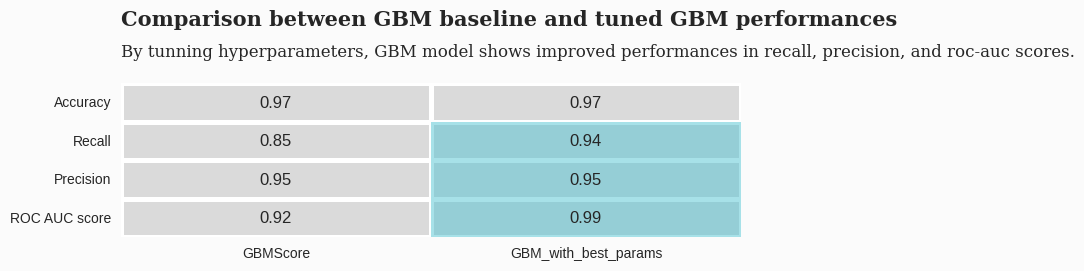

In [464]:
import matplotlib

fig = plt.figure(figsize=(8, 11))
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

colors = ['#DADADA', '#DADADA']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# change background color
background_color='#fbfbfb'
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)


# overall

sns.heatmap(new_df, cmap=colormap, annot=True, linewidths=2.5, cbar=False, ax=ax0)

ax0.tick_params(axis=u'both', which=u'both', length=0)
ax0.text(0, -1.5, 'Comparison between GBM baseline and tuned GBM performances', fontfamily='serif', fontsize=15, fontweight='bold')
ax0.text(0, -0.7, 'By tunning hyperparameters, GBM model shows improved performances in recall, precision, and roc-auc scores.',
        fontfamily='serif', fontsize=12)


from matplotlib.patches import Rectangle
rect = ax0.add_patch(Rectangle((1, 1), 3, 3, fill=True,color='#51C4D3', edgecolor='white', lw=0,alpha=0.5))

plt.show()

By using the best hyperparamters, we got an improved GBM model showing 7% increased performance (0.993 of ROC-AUC score) compared to the baseline (0.916 of ROC-AUC).